# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings

In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
# Try loading one file

df = pd.read_parquet('D:\\personal\\upgrad\\Datasets\\trip_records\\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [8]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

data_folder = 'D:\\personal\\upgrad\\Datasets\\trip_records' # Placeholder path, adjust as needed

# Create a list of all the twelve files to read
# Filter for parquet files starting with '2023-'
file_list = [f for f in os.listdir(data_folder) if f.startswith('2023-') and f.endswith('.parquet')]
file_list.sort() # Ensure files are processed in chronological order

# initialise an empty dataframe
df_sampled = pd.DataFrame()

# Define the sampling fraction
sample_fraction = 0.05 # As specified in the problem description

# Select the folder having data files
# os.chdir('D:\\personal\upgrad\\Datasets\\trip_records')

# Create a list of all the twelve files to read
# file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        # file_path = os.path.join(os.getcwd(), file_name)
        file_path = os.path.join(data_folder, file_name)

        # Reading the current file
        current_month_df = pd.read_parquet(file_path)

        # Convert 'tpep_pickup_datetime' to datetime objects and extract date and hour
        current_month_df['pickup_date'] = current_month_df['tpep_pickup_datetime'].dt.date
        current_month_df['pickup_hour'] = current_month_df['tpep_pickup_datetime'].dt.hour


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data_month = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in current_month_df['pickup_date'].unique():
            daily_data = current_month_df[current_month_df['pickup_date'] == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = daily_data[daily_data['pickup_hour'] == hour]

                if not hour_data.empty:
                    # Sample 5% of the hourly data randomly
                    sample = hour_data.sample(frac=sample_fraction, random_state=42)
                    # add data of this hour to the dataframe
                    sampled_data_month = pd.concat([sampled_data_month, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df_sampled = pd.concat([df_sampled, sampled_data_month])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Drop the temporary 'pickup_date' and 'pickup_hour' columns
df_sampled = df_sampled.drop(columns=['pickup_date', 'pickup_hour'])

print(f"Total sampled rows: {len(df_sampled)}")
df_sampled.info()

# Store the df in csv/parquet
output_file_path_parquet = 'sampled_nyc_taxi_2023.parquet'
output_file_path_csv = 'sampled_nyc_taxi_2023.csv'

df_sampled.to_parquet(output_file_path_parquet, index=False)
df_sampled.to_csv(output_file_path_csv, index=False)

print(f"Sampled data saved to {output_file_path_parquet} and {output_file_path_csv}")

Total sampled rows: 1896400
<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 428 to 2705104
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 1

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [12]:
# Load the new data file

df = pd.read_parquet('sampled_nyc_taxi_2023.parquet')

print("DataFrame head:")
print(df.head())

print("\nDataFrame info:")
df.info()

DataFrame head:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  

In [13]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [15]:
# Fix the index and drop any columns that are not needed
df = df.reset_index(drop=True)
if 'index' in df.columns:
    df = df.drop(columns=['index'])

print("DataFrame after fixing index (if needed) and checking for unnecessary columns:")
print(df.head())
print("\nDataFrame info after initial column check:")
df.info()


DataFrame after fixing index (if needed) and checking for unnecessary columns:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns

print("\nChecking for a second airport fee column. Based on df.info(), only 'airport_fee' exists.")
print("No combination needed for airport fee columns as only one ('airport_fee') is present in the data.")
print("Unique values in 'airport_fee':", df['airport_fee'].unique())
print("Value counts for 'airport_fee':\n", df['airport_fee'].value_counts(dropna=False))




Checking for a second airport fee column. Based on df.info(), only 'airport_fee' exists.
No combination needed for airport fee columns as only one ('airport_fee') is present in the data.
Unique values in 'airport_fee': [ 1.25  0.     nan -1.25]
Value counts for 'airport_fee':
 airport_fee
 NaN     1747917
 0.00     135529
 1.25      12953
-1.25          1
Name: count, dtype: int64


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [18]:
# check where values of fare amount are negative
print("\nRows where 'fare_amount' is negative:")
print(df[df['fare_amount'] < 0])



Rows where 'fare_amount' is negative:
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, Airport_fee]
Index: []


Did you notice something different in the `RatecodeID` column for above records?

In [19]:
# Analyse RatecodeID for the negative fare amounts
print("\nRatecodeID for negative fare amounts:")
print(df[df['fare_amount'] < 0]['RatecodeID'].value_counts(dropna=False))



RatecodeID for negative fare amounts:
Series([], Name: count, dtype: int64)


In [20]:
# Find which columns have negative values
print("\nColumns with negative values and their counts:")
for col in ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']:
    if (df[col] < 0).any():
        print(f"{col}: {(df[col] < 0).sum()} negative values")



Columns with negative values and their counts:
extra: 3 negative values
mta_tax: 73 negative values
improvement_surcharge: 78 negative values
total_amount: 78 negative values
congestion_surcharge: 56 negative values
airport_fee: 1 negative values


In [21]:
# fix these negative values
monetary_columns = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee'
]

for col in monetary_columns:
    if (df[col] < 0).any():
        print(f"Fixing negative values in '{col}'...")
        df.loc[df[col] < 0, col] = 0

print("\nAfter fixing negative monetary values, checking again:")
for col in monetary_columns:
    if (df[col] < 0).any():
        print(f"ERROR: {col} still has negative values.")
    else:
        print(f"{col}: No negative values found.")

# Also, ensure 'trip_distance' is not negative, though typically distance is non-negative.
if (df['trip_distance'] < 0).any():
    print(f"Fixing negative values in 'trip_distance'...")
    df.loc[df['trip_distance'] < 0, 'trip_distance'] = 0
    print("trip_distance: No negative values found after fix.")
else:
    print("trip_distance: No negative values found.")

print("\nDataFrame head after fixing negative values:")
print(df.head())


Fixing negative values in 'extra'...
Fixing negative values in 'mta_tax'...
Fixing negative values in 'improvement_surcharge'...
Fixing negative values in 'total_amount'...
Fixing negative values in 'congestion_surcharge'...
Fixing negative values in 'airport_fee'...

After fixing negative monetary values, checking again:
fare_amount: No negative values found.
extra: No negative values found.
mta_tax: No negative values found.
tip_amount: No negative values found.
tolls_amount: No negative values found.
improvement_surcharge: No negative values found.
total_amount: No negative values found.
congestion_surcharge: No negative values found.
airport_fee: No negative values found.
trip_distance: No negative values found.

DataFrame head after fixing negative values:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2  

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column

missing_values_proportion = df.isnull().sum() / len(df) * 100
print("Proportion of missing values in each column (%):\n", missing_values_proportion[missing_values_proportion > 0].sort_values(ascending=False))


Proportion of missing values in each column (%):
 airport_fee             92.170270
Airport_fee             11.250633
passenger_count          3.420903
RatecodeID               3.420903
store_and_fwd_flag       3.420903
congestion_surcharge     3.420903
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [23]:
# Display the rows with null values
print("\nRows with null values in 'passenger_count':")
print(df[df['passenger_count'].isnull()])
# Impute NaN values in 'passenger_count'
print("\nValue counts for 'passenger_count' before imputation:")
print(df['passenger_count'].value_counts(dropna=False))
passenger_count_mode = df['passenger_count'].mode()[0]
df['passenger_count'].fillna(passenger_count_mode, inplace=True)
print(f"\nNaN values in 'passenger_count' imputed with mode ({passenger_count_mode}).")
initial_zero_passengers = (df['passenger_count'] == 0).sum()
df.loc[(df['passenger_count'] == 0) & (df['total_amount'] > 0), 'passenger_count'] = 1
print(f"Replaced {initial_zero_passengers - (df['passenger_count'] == 0).sum()} zero passenger counts (where total_amount > 0) with 1.")

print("\nValue counts for 'passenger_count' after imputation and zero handling:")
print(df['passenger_count'].value_counts(dropna=False))
print(f"Missing values in 'passenger_count' after handling: {df['passenger_count'].isnull().sum()}")



Rows with null values in 'passenger_count':
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15              2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
42              2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
43              2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
46              2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   
...           ...                  ...                   ...              ...   
1896343         1  2023-09-30 23:18:31   2023-09-30 23:30:35              NaN   
1896356         1  2023-09-30 23:42:07   2023-10-01 00:05:22              NaN   
1896369         1  2023-09-30 23:59:39   2023-10-01 00:15:03              NaN   
1896376         1  2023-09-30 23:47:09   2023-10-01 00:03:01              NaN   
1896387         1  2023-09-30 23:17:34   2023-09-30 23:30:46    

C:\Users\admin\AppData\Local\Temp\ipykernel_9204\2755605361.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(passenger_count_mode, inplace=True)


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [24]:
# Fix missing values in 'RatecodeID'
print("\nValue counts for 'RatecodeID' before imputation:")
print(df['RatecodeID'].value_counts(dropna=False))
# Impute NaN values in 'RatecodeID'.
ratecode_mode = df['RatecodeID'].mode()[0]
df['RatecodeID'].fillna(ratecode_mode, inplace=True)
print(f"\nNaN values in 'RatecodeID' imputed with mode ({ratecode_mode}).")
print(f"Missing values in 'RatecodeID' after handling: {df['RatecodeID'].isnull().sum()}")




Value counts for 'RatecodeID' before imputation:
RatecodeID
1.0     1729259
2.0       71670
NaN       64874
99.0      10472
5.0       10275
3.0        6124
4.0        3723
6.0           3
Name: count, dtype: int64

NaN values in 'RatecodeID' imputed with mode (1.0).
Missing values in 'RatecodeID' after handling: 0


C:\Users\admin\AppData\Local\Temp\ipykernel_9204\1888028984.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(ratecode_mode, inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [25]:
# handle null values in congestion_surcharge

print("\nValue counts for 'congestion_surcharge' before imputation:")
print(df['congestion_surcharge'].value_counts(dropna=False))
# Impute NaN values in 'congestion_surcharge'.
df['congestion_surcharge'].fillna(0.0, inplace=True)
print(f"\nNaN values in 'congestion_surcharge' imputed with 0.0.")
print(f"Missing values in 'congestion_surcharge' after handling: {df['congestion_surcharge'].isnull().sum()}")



Value counts for 'congestion_surcharge' before imputation:
congestion_surcharge
2.5    1690572
0.0     140953
NaN      64874
0.5          1
Name: count, dtype: int64

NaN values in 'congestion_surcharge' imputed with 0.0.
Missing values in 'congestion_surcharge' after handling: 0


C:\Users\admin\AppData\Local\Temp\ipykernel_9204\3469038849.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['congestion_surcharge'].fillna(0.0, inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [26]:
# Handle any remaining missing values

print("\nChecking for any remaining missing values:")
remaining_missing_proportion = df.isnull().sum() / len(df) * 100
print(remaining_missing_proportion[remaining_missing_proportion > 0].sort_values(ascending=False))

if (remaining_missing_proportion == 0).all():
    print("\nNo more missing values found in the DataFrame.")
else:
    print("\nSome columns still have missing values. Review and handle as appropriate.")

# Convert passenger_count and RatecodeID to integer types since they represent counts/codes
df['passenger_count'] = df['passenger_count'].astype(int)
df['RatecodeID'] = df['RatecodeID'].astype(int)
print("\nData types after handling missing values for passenger_count and RatecodeID:")
print(df[['passenger_count', 'RatecodeID']].info())


Checking for any remaining missing values:
airport_fee           92.170270
Airport_fee           11.250633
store_and_fwd_flag     3.420903
dtype: float64

Some columns still have missing values. Review and handle as appropriate.

Data types after handling missing values for passenger_count and RatecodeID:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 2 columns):
 #   Column           Dtype
---  ------           -----
 0   passenger_count  int32
 1   RatecodeID       int32
dtypes: int32(2)
memory usage: 14.5 MB
None


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [27]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

print("Description of numerical columns (pre-outlier fixing):\n", df.describe())

Description of numerical columns (pre-outlier fixing):
            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896400e+06                     1896400                     1896400   
mean   1.733026e+00  2023-07-02 19:59:52.930795  2023-07-02 20:17:18.919563   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 16:10:08.750000  2023-04-02 16:27:43.500000   
50%    2.000000e+00  2023-06-27 15:44:22.500000         2023-06-27 16:01:15   
75%    2.000000e+00         2023-10-06 19:37:45         2023-10-06 19:53:39   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476401e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.896400e+06   1.896400e+06  1.896400e+06  1.896400e+06   
mean      1.372227e+00   3.858293e+00  1.612981e+00  1.652814e+02   
min       0.000000e+00   

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [28]:
print("\nValue counts for 'passenger_count' before removing > 6:")
print(df['passenger_count'].value_counts(dropna=False))
# remove passenger_count > 6
initial_rows = len(df)
df = df[df['passenger_count'] <= 6]
print(f"\nRemoved {initial_rows - len(df)} rows where 'passenger_count' was greater than 6.")
print("Value counts for 'passenger_count' after removing > 6:\n", df['passenger_count'].value_counts(dropna=False))




Value counts for 'passenger_count' before removing > 6:
passenger_count
1    1471763
2     277298
3      69034
4      38537
5      23871
6      15860
0         16
8         11
7          5
9          5
Name: count, dtype: int64

Removed 21 rows where 'passenger_count' was greater than 6.
Value counts for 'passenger_count' after removing > 6:
 passenger_count
1    1471763
2     277298
3      69034
4      38537
5      23871
6      15860
0         16
Name: count, dtype: int64


In [30]:
# Continue with outlier handling

print("\nEntries where 'trip_distance' is ~0 and 'fare_amount' > 300:")
problem_trips_1 = df[(df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)]
print(f"Number of such entries: {len(problem_trips_1)}")

df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]
print(f"Removed {len(problem_trips_1)} entries.")


print("\nEntries where 'trip_distance' and 'fare_amount' are 0, but PU/DO locations are different:")
problem_trips_2 = df[(df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])]
print(f"Number of such entries: {len(problem_trips_2)}")

df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]
print(f"Removed {len(problem_trips_2)} entries.")


print("\nEntries where 'trip_distance' is more than 250 miles:")
problem_trips_3 = df[df['trip_distance'] > 250]
print(f"Number of such entries: {len(problem_trips_3)}")

df = df[df['trip_distance'] <= 250]
print(f"Removed {len(problem_trips_3)} entries.")


print("\nEntries where 'payment_type' is 0:")
problem_trips_4 = df[df['payment_type'] == 0]
print(f"Number of such entries: {len(problem_trips_4)}")

df = df[df['payment_type'] != 0]
print(f"Removed {len(problem_trips_4)} entries.")

print("\nMax values after outlier handling:")
print(df[['trip_distance', 'fare_amount', 'total_amount', 'passenger_count']].max())





Entries where 'trip_distance' is ~0 and 'fare_amount' > 300:
Number of such entries: 0
Removed 0 entries.

Entries where 'trip_distance' and 'fare_amount' are 0, but PU/DO locations are different:
Number of such entries: 0
Removed 0 entries.

Entries where 'trip_distance' is more than 250 miles:
Number of such entries: 0
Removed 0 entries.

Entries where 'payment_type' is 0:
Number of such entries: 0
Removed 0 entries.

Max values after outlier handling:
trip_distance         204.86
fare_amount        143163.45
total_amount       143167.45
passenger_count         6.00
dtype: float64


In [31]:
# Do any columns need standardising?
print("\nStandardization of columns is not strictly required for EDA, but would be considered for ML modeling.")

print("\nDataFrame info after outlier handling:")
df.info()
print("\nDescription of numerical columns after outlier fixing:\n", df.describe())



Standardization of columns is not strictly required for EDA, but would be considered for ML modeling.

DataFrame info after outlier handling:
<class 'pandas.core.frame.DataFrame'>
Index: 1831391 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        int32         
 4   trip_distance          float64       
 5   RatecodeID             int32         
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_s

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [32]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [33]:
print("\n3.1.1 Variable Categorization:")

print("* `VendorID`: Categorical (1=Creative Mobile Technologies, 2=VeriFone Inc.)")
print("* `tpep_pickup_datetime`: Temporal (datetime object, can derive numerical features like hour, day, month)")
print("* `tpep_dropoff_datetime`: Temporal (datetime object, can derive numerical features like hour, day, month)")
print("* `passenger_count`: Numerical (Discrete, count of passengers)")
print("* `trip_distance`: Numerical (Continuous, distance in miles)")
print("* `RatecodeID`: Categorical (1=Standard, 2=JFK, etc.)")
print("* `store_and_fwd_flag`: Categorical (Y/N)")
print("* `PULocationID`: Categorical/Identifier (TLC Taxi Zone ID, can be treated as categorical for grouping)")
print("* `DOLocationID`: Categorical/Identifier (TLC Taxi Zone ID, can be treated as categorical for grouping)")
print("* `payment_type`: Categorical (1=Credit card, 2=Cash, etc.)")


df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60 # in minutes
df['pickup_date'] = df['tpep_pickup_datetime'].dt.date #

print("* `pickup_hour`: Numerical (Discrete, derived from pickup datetime)")
print("* `trip_duration`: Numerical (Continuous, derived duration in minutes)")
print("* `pickup_day_of_week`: Categorical (Derived from pickup datetime)")
print("* `pickup_month`: Categorical (Derived from pickup datetime)")
print("* `pickup_date`: Temporal (Derived from pickup datetime, for daily grouping)")


print("\nThe following monetary parameters belong in the same category, is it categorical or numerical?")
print("These are all Numerical (Continuous, representing monetary amounts):")
print("* `fare_amount`")
print("* `extra`")
print("* `mta_tax`")
print("* `tip_amount`")
print("* `tolls_amount`")
print("* `improvement_surcharge`")
print("* `total_amount`")
print("* `congestion_surcharge`")
print("* `airport_fee`")



3.1.1 Variable Categorization:
* `VendorID`: Categorical (1=Creative Mobile Technologies, 2=VeriFone Inc.)
* `tpep_pickup_datetime`: Temporal (datetime object, can derive numerical features like hour, day, month)
* `tpep_dropoff_datetime`: Temporal (datetime object, can derive numerical features like hour, day, month)
* `passenger_count`: Numerical (Discrete, count of passengers)
* `trip_distance`: Numerical (Continuous, distance in miles)
* `RatecodeID`: Categorical (1=Standard, 2=JFK, etc.)
* `store_and_fwd_flag`: Categorical (Y/N)
* `PULocationID`: Categorical/Identifier (TLC Taxi Zone ID, can be treated as categorical for grouping)
* `DOLocationID`: Categorical/Identifier (TLC Taxi Zone ID, can be treated as categorical for grouping)
* `payment_type`: Categorical (1=Credit card, 2=Cash, etc.)
* `pickup_hour`: Numerical (Discrete, derived from pickup datetime)
* `trip_duration`: Numerical (Continuous, derived duration in minutes)
* `pickup_day_of_week`: Categorical (Derived from pi

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [36]:
# Find and show the hourly trends in taxi pickups

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='pickup_hour', palette='viridis')
plt.title('Distribution of Taxi Pickups by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_9204\238506019.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='pickup_hour', palette='viridis')


C:\Users\admin\AppData\Local\Temp\ipykernel_9204\2048432259.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='pickup_day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='plasma')


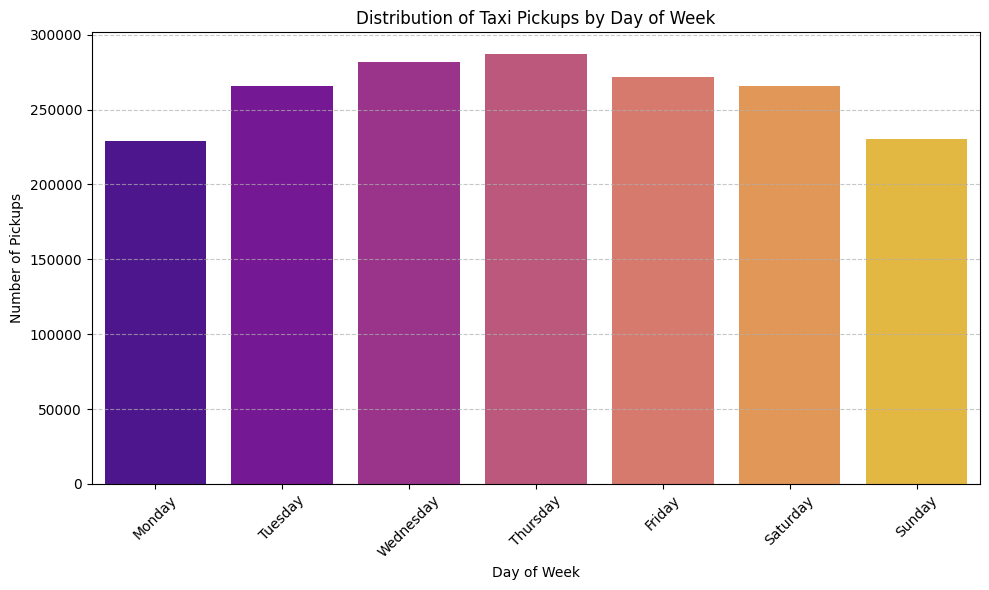

In [37]:
# Find and show the daily trends in taxi pickups (days of the week)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='pickup_day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='plasma')
plt.title('Distribution of Taxi Pickups by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_9204\2509470713.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='pickup_month', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette='cividis')


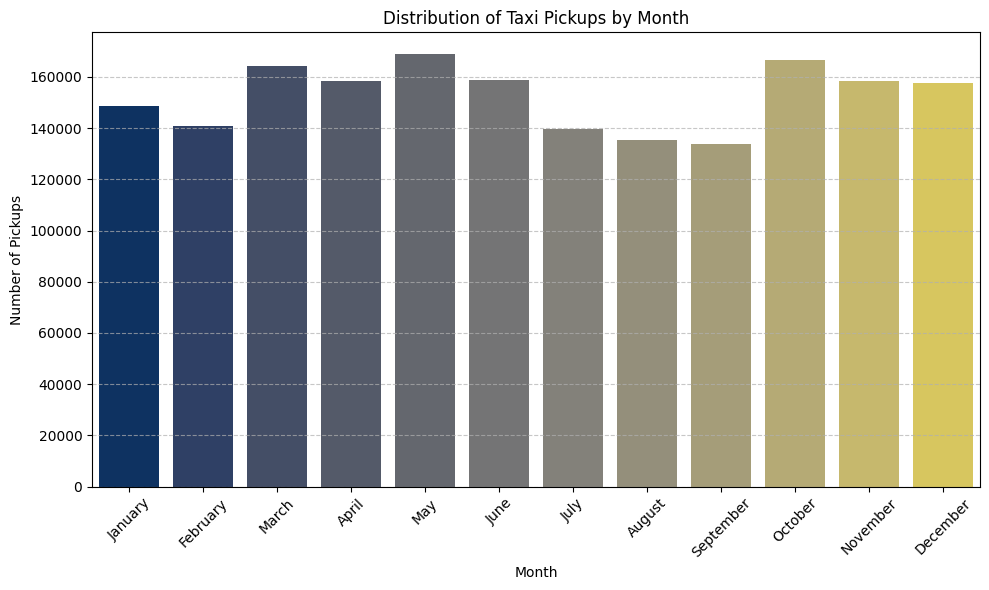

In [38]:
# Show the monthly trends in pickups

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='pickup_month', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette='cividis')
plt.title('Distribution of Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [39]:
# Analyse the above parameters
print("\nFinancial Parameters Analysis (checking for zeros):")
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
for col in financial_cols:
    zero_count = (df[col] == 0).sum()
    print(f"'{col}' has {zero_count} zero values ({(zero_count/len(df)*100):.2f}%).")



Financial Parameters Analysis (checking for zeros):
'fare_amount' has 575 zero values (0.03%).
'tip_amount' has 410234 zero values (22.40%).
'total_amount' has 329 zero values (0.02%).
'trip_distance' has 22928 zero values (1.25%).


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [40]:
# Create a df with non zero entries for the selected parameters.
df_financial = df[(df['fare_amount'] > 0) & (df['tip_amount'] >= 0) & (df['total_amount'] > 0) & (df['trip_distance'] > 0)].copy()
print(f"\nCreated 'df_financial' with {len(df_financial)} rows, excluding trips with zero fare_amount, total_amount, or trip_distance.")



Created 'df_financial' with 1808147 rows, excluding trips with zero fare_amount, total_amount, or trip_distance.


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend


Monthly Revenue Trend:
 pickup_month
January      4055113.78
February     3834417.13
March        4624721.17
April        4540763.32
May          4944775.70
June         4654478.32
July         4051763.81
August       3948512.58
September    4171703.09
October      4957376.27
November     4614462.45
December     4602759.36
Name: total_amount, dtype: float64


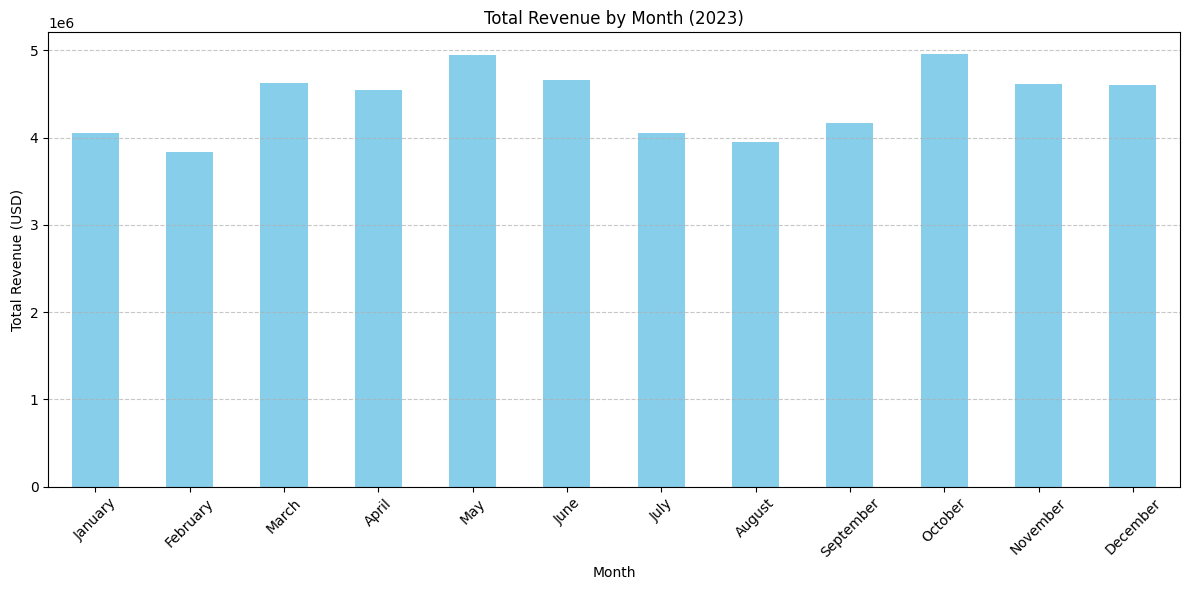

In [41]:
# Group data by month and analyse monthly revenue
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
print("\nMonthly Revenue Trend:\n", monthly_revenue)

plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Month (2023)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue


Quarterly Revenue Proportion (%):
 quarter
1    23.611419
2    26.678852
3    22.965632
4    26.744097
Name: total_amount, dtype: float64


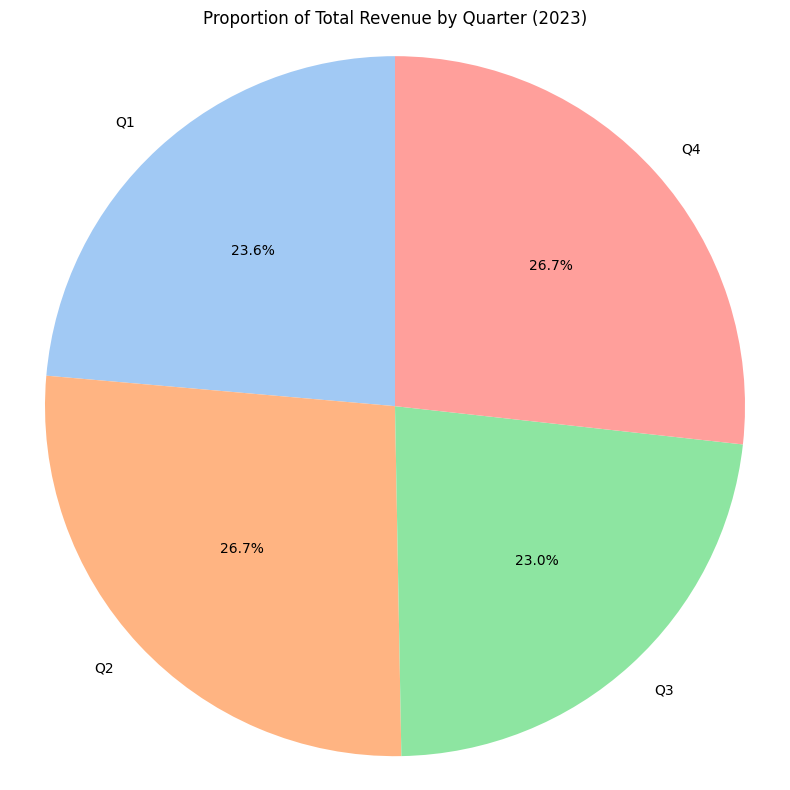

In [42]:
# Calculate proportion of each quarter
df['quarter'] = df['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = df.groupby('quarter')['total_amount'].sum()
total_annual_revenue = quarterly_revenue.sum()
quarterly_revenue_proportion = (quarterly_revenue / total_annual_revenue) * 100

print("\nQuarterly Revenue Proportion (%):\n", quarterly_revenue_proportion)

plt.figure(figsize=(8, 8))
plt.pie(quarterly_revenue_proportion, labels=[f'Q{q}' for q in quarterly_revenue_proportion.index],
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Total Revenue by Quarter (2023)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

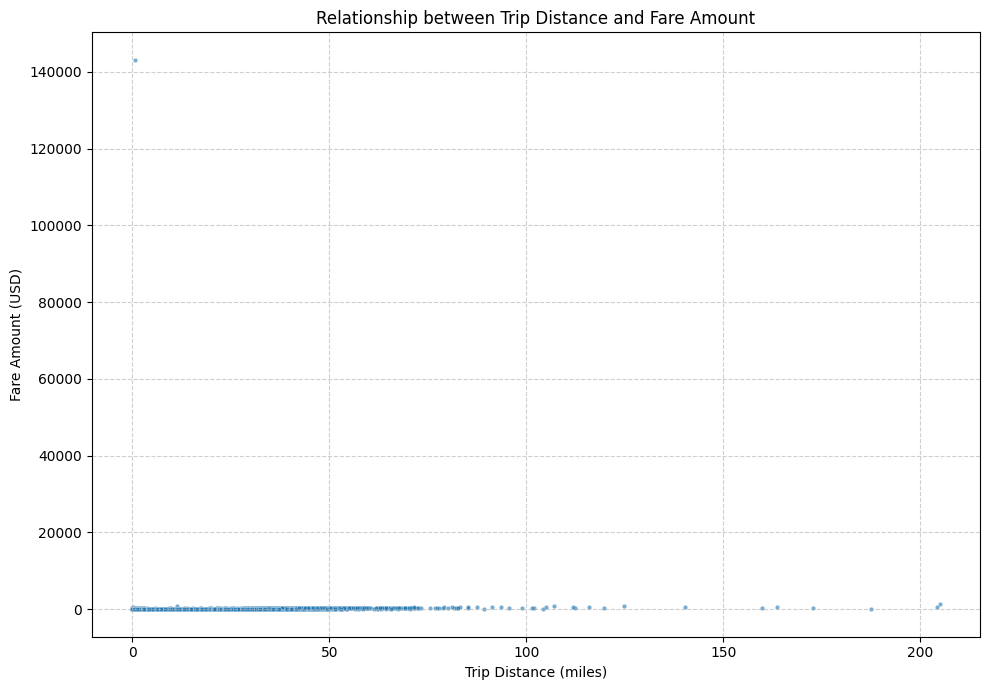


Correlation between Trip Distance and Fare Amount (excluding zero/negative values): 0.16


In [43]:
# Show how trip fare is affected by distance

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_financial, x='trip_distance', y='fare_amount', alpha=0.6, s=10) # s=10 for point size
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

correlation_distance_fare = df_financial['trip_distance'].corr(df_financial['fare_amount'])
print(f"\nCorrelation between Trip Distance and Fare Amount (excluding zero/negative values): {correlation_distance_fare:.2f}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`


Correlation between Fare Amount and Trip Duration: 0.05


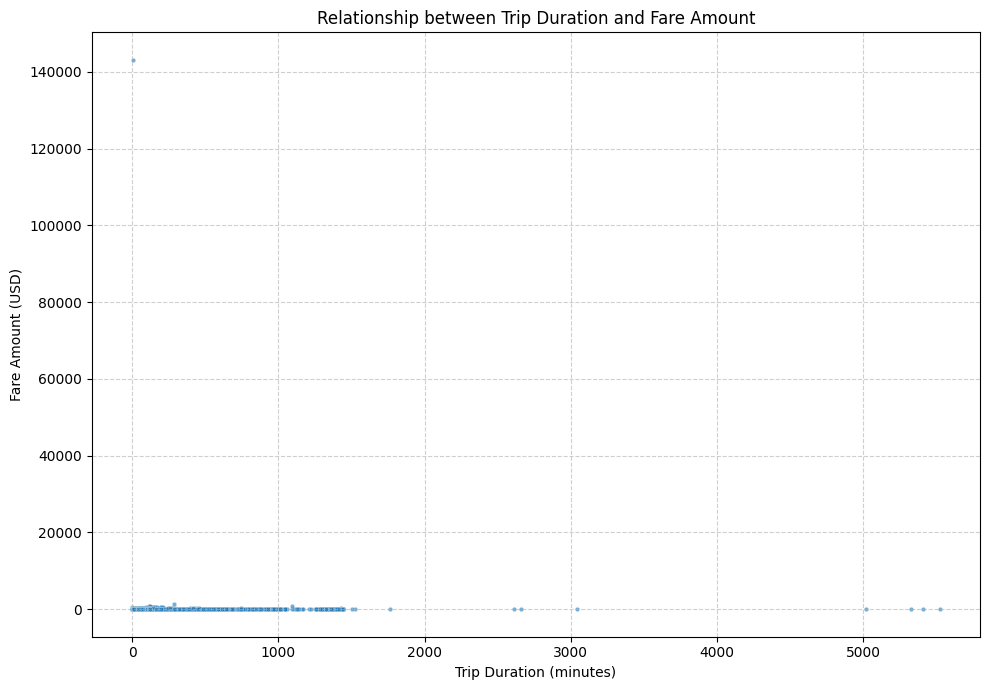

In [44]:
# Show relationship between fare and trip duration
df_financial['trip_duration_minutes'] = df_financial['trip_duration']
df_financial = df_financial[df_financial['trip_duration_minutes'] > 0].copy()


# Correlation 1: fare_amount and trip duration
correlation_fare_duration = df_financial['fare_amount'].corr(df_financial['trip_duration_minutes'])
print(f"\nCorrelation between Fare Amount and Trip Duration: {correlation_fare_duration:.2f}")
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_financial, x='trip_duration_minutes', y='fare_amount', alpha=0.6, s=10)
plt.title('Relationship between Trip Duration and Fare Amount')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [45]:
# Show relationship between fare and number of passengers

# Correlation 2: fare_amount and passenger_count
correlation_fare_passengers = df_financial['fare_amount'].corr(df_financial['passenger_count'])
print(f"Correlation between Fare Amount and Passenger Count: {correlation_fare_passengers:.2f}")
plt.figure(figsize=(10, 7))
sns.boxplot(data=df_financial, x='passenger_count', y='fare_amount')
plt.title('Relationship between Passenger Count and Fare Amount')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Correlation between Fare Amount and Passenger Count: 0.01


In [46]:
# Show relationship between tip and trip distance

# Correlation 3: tip_amount and trip_distance
correlation_tip_distance = df_financial['tip_amount'].corr(df_financial['trip_distance'])
print(f"Correlation between Tip Amount and Trip Distance: {correlation_tip_distance:.2f}")
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_financial, x='trip_distance', y='tip_amount', alpha=0.6, s=10)
plt.title('Relationship between Tip Amount and Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Correlation between Tip Amount and Trip Distance: 0.59


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)


Distribution of Payment Types:
payment_type
1    1492301
2     316412
4      13672
3       9006
Name: count, dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_9204\2681663312.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette='viridis')


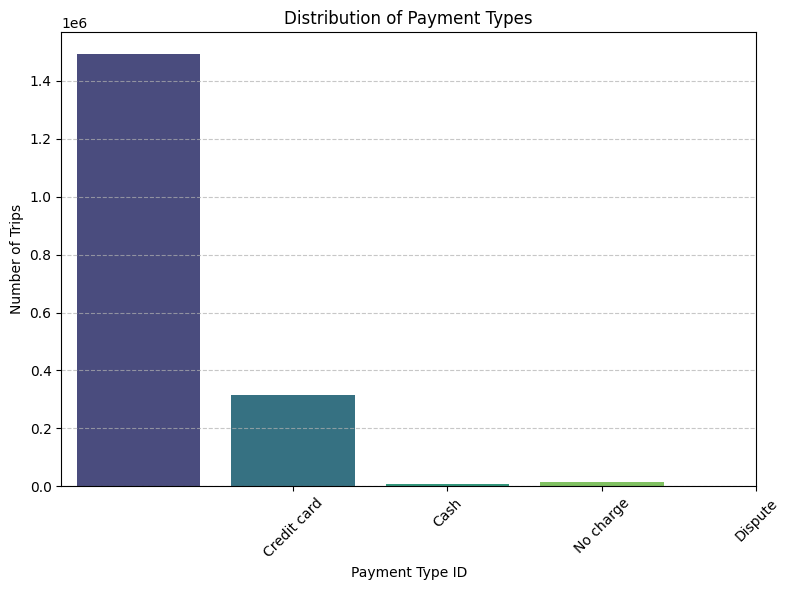

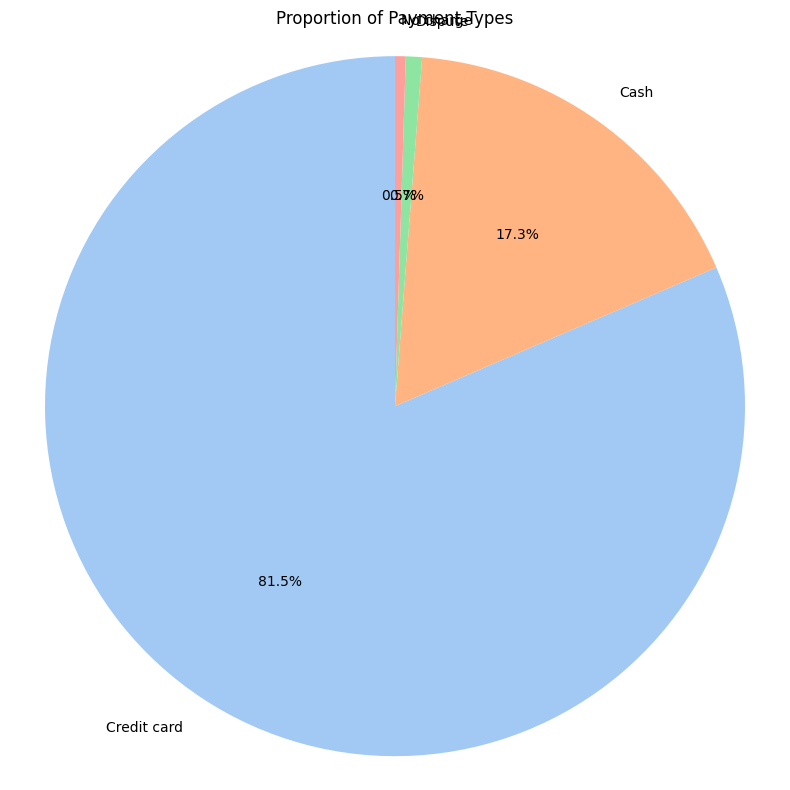

In [50]:
# Analyse the distribution of different payment types (payment_type).

print("\nDistribution of Payment Types:")
payment_type_counts = df['payment_type'].value_counts()
print(payment_type_counts)

# Mapping payment types for better readability
payment_type_map = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown', # As per general data dictionary, though not in the provided subset description for 2023 data.
    6: 'Voided trip' # As per general data dictionary, though not in the provided subset description for 2023 data.
}
df['payment_type_name'] = df['payment_type'].map(payment_type_map)

plt.figure(figsize=(8, 6))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette='viridis')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type ID')
plt.ylabel('Number of Trips')
plt.xticks(ticks=payment_type_counts.index, labels=[payment_type_map.get(i, f'ID {i}') for i in payment_type_counts.index], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(payment_type_counts, labels=[payment_type_map.get(i, f'ID {i}') for i in payment_type_counts.index],
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Payment Types')
plt.axis('equal')
plt.tight_layout()
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [51]:
!pip install geopandas

  Using cached certifi-2025.6.15-py3-none-any.whl.metadata (2.4 kB)
   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
    --------------------------------------- 0.3/19.2 MB ? eta -:--:--
   -- ------------------------------------- 1.0/19.2 MB 2.5 MB/s eta 0:00:08
   ---- ----------------------------------- 2.1/19.2 MB 3.6 MB/s eta 0:00:05
   ----- ---------------------------------- 2.6/19.2 MB 3.1 MB/s eta 0:00:06
   ------ --------------------------------- 3.1/19.2 MB 3.4 MB/s eta 0:00:05
   --------- ------------------------------ 4.5/19.2 MB 3.6 MB/s eta 0:00:05
   ----------- ---------------------------- 5.5/19.2 MB 3.9 MB/s eta 0:00:04
   -------------- ------------------------- 6.8/19.2 MB 4.2 MB/s eta 0:00:03
   ---------------- ----------------------- 7.9/19.2 MB 4.4 MB/s eta 0:00:03
   ---------------- ----------------------- 8.1/19.2 MB 4.3 MB/s eta 0:00:03
   ------------------- -------------------- 9.4/19.2 MB 4.2 MB/s eta 0:00:03
   -------------------

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.


Taxi Zones GeoDataFrame head:
   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  

Taxi Zones GeoDataFrame info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263

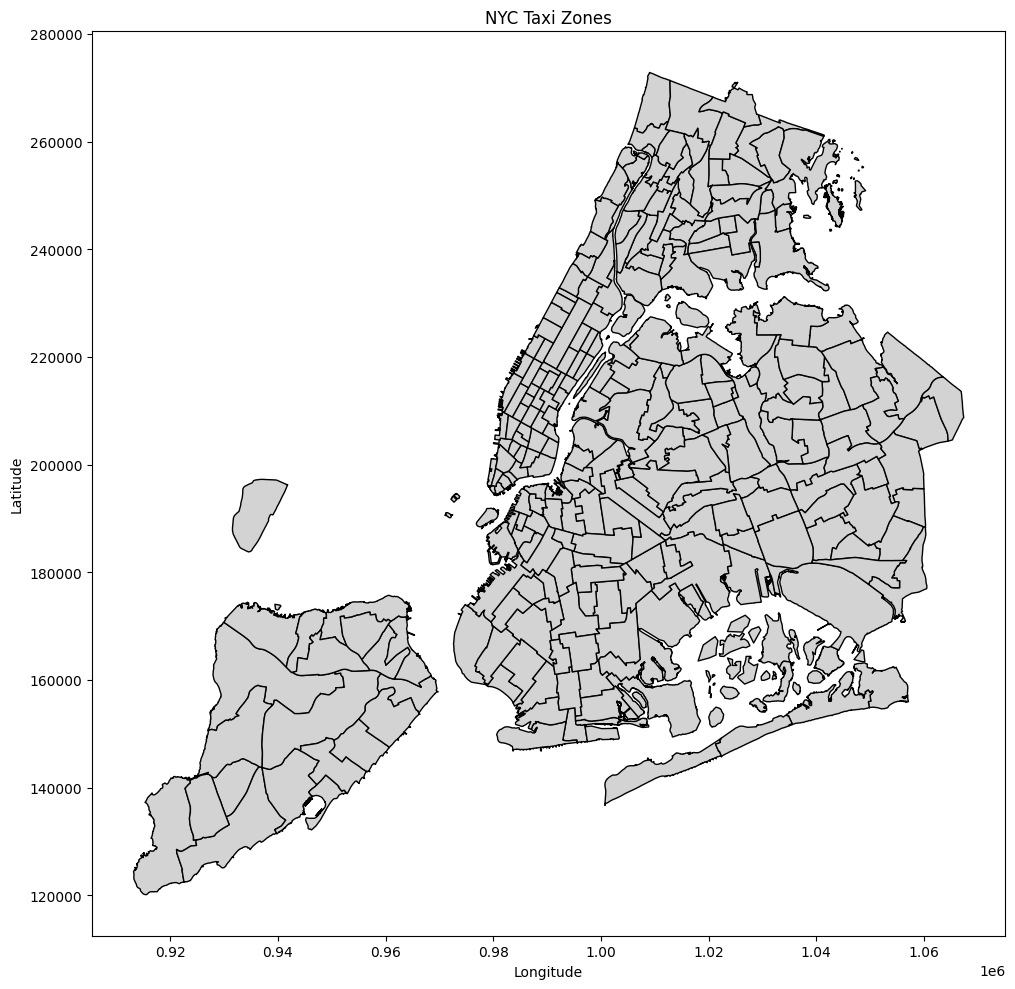

In [ ]:
import geopandas as gpd

taxi_zones_folder = 'D:\\personal\\upgrad\\Datasets\\taxi_zones'
# Read the shapefile using geopandas
try:
    # Read the shapefile using geopandas
    zones = gpd.read_file(os.path.join(taxi_zones_folder, 'taxi_zones.shp'))
    print("\nTaxi Zones GeoDataFrame head:")
    print(zones.head())

    print("\nTaxi Zones GeoDataFrame info:")
    zones.info()

    # Plot the zones to visualize
    print("\nPlotting Taxi Zones map:")
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    zones.plot(ax=ax, color='lightgray', edgecolor='black')
    ax.set_title('NYC Taxi Zones')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"\nError loading or plotting taxi zones shapefile: {e}")
    print("Please ensure the 'taxi_zones' folder and 'taxi_zones.shp' file (along with other necessary files like .dbf, .shx etc.) are correctly located.")


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

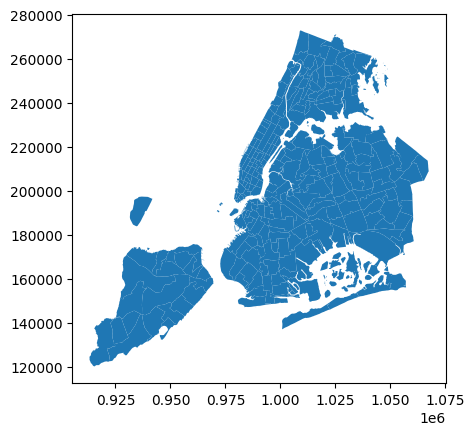

In [53]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [54]:
# Merge zones and trip records using locationID and PULocationID

df_merged_pu = pd.merge(df, zones[['LocationID', 'zone', 'borough', 'geometry']],
                        left_on='PULocationID', right_on='LocationID', how='left')
print("\nDataFrame head after merging with pickup zones data:")
print(df_merged_pu.head())
print("\nDataFrame info after merging:")
df_merged_pu.info()



DataFrame head after merging with pickup zones data:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15                1   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46                2   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36                3   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55                1   
4         1  2023-01-01 00:42:56   2023-01-01 01:16:33                2   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74           1                  N           138           256   
1           1.24           1                  N           161           237   
2           1.44           1                  N           237           141   
3           0.54           1                  N           143           142   
4           7.10           1                  N           246            37   

   payment_type  ...

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [55]:
# Group data by location and calculate the number of trips
trips_per_zone = df_merged_pu.groupby('PULocationID').size().reset_index(name='total_pickups')
print("\nTotal pickups per LocationID (top 10):\n", trips_per_zone.sort_values(by='total_pickups', ascending=False).head(10))




Total pickups per LocationID (top 10):
      PULocationID  total_pickups
125           132          96827
229           237          86905
154           161          85948
228           236          77517
155           162          65634
131           138          64177
178           186          63471
222           230          61315
135           142          60887
163           170          54493


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [56]:
# Merge trip counts back to the zones GeoDataFrame

zones_with_trips = pd.merge(zones, trips_per_zone, left_on='LocationID', right_on='PULocationID', how='left')
zones_with_trips['total_pickups'] = zones_with_trips['total_pickups'].fillna(0).astype(int) # Fill NaNs with 0 for zones with no pickups
print("\nZones GeoDataFrame with total pickups (head):\n", zones_with_trips.head())
print("\nZones GeoDataFrame info with total pickups:\n", zones_with_trips.info())



Zones GeoDataFrame with total pickups (head):
    OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  total_pickups  
0           1.0            214  
1 

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [58]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
# Plot the map and display it
zones_with_trips.plot(column='total_pickups', ax=ax, legend=True,
                      legend_kwds={'label': "Number of Pickups", 'orientation': "vertical"},
                      cmap='OrRd', # Choose a colormap, e.g., 'OrRd', 'YlGnBu'
                      edgecolor='black',
                      missing_kwds={"color": "lightgrey", "label": "No data"}) # Handle zones with no pickups

ax.set_title('NYC Taxi Pickups by Zone (2023 Sampled Data)', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.axis('off') # Turn off axes for a cleaner map look
plt.tight_layout()
plt.show()




In [59]:
# can you try displaying the zones DF sorted by the number of trips?
print("\nTop 10 Zones by Number of Pickups:")
print(zones_with_trips.sort_values(by='total_pickups', ascending=False).head(10)[['zone', 'borough', 'total_pickups']])



Top 10 Zones by Number of Pickups:
                             zone    borough  total_pickups
131                   JFK Airport     Queens          96827
236         Upper East Side South  Manhattan          86905
160                Midtown Center  Manhattan          85948
235         Upper East Side North  Manhattan          77517
161                  Midtown East  Manhattan          65634
137             LaGuardia Airport     Queens          64177
185  Penn Station/Madison Sq West  Manhattan          63471
229     Times Sq/Theatre District  Manhattan          61315
141           Lincoln Square East  Manhattan          60887
169                   Murray Hill  Manhattan          54493


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [60]:
# Find routes which have the slowest speeds at different times of the day

df_financial['trip_speed_mph'] = (df_financial['trip_distance'] / (df_financial['trip_duration_minutes'] / 60)).replace([np.inf, -np.inf], np.nan)
df_financial.dropna(subset=['trip_speed_mph'], inplace=True) # Remove NaNs introduced by inf or zero duration

# Calculate average speed per hour
avg_speed_per_hour = df_financial.groupby('pickup_hour')['trip_speed_mph'].mean().reset_index()
print("\nAverage Trip Speed (MPH) by Hour of Day:\n", avg_speed_per_hour.sort_values(by='trip_speed_mph').head())

min_trips_for_route_analysis = 10 # Define a threshold

route_hourly_speeds = df_financial.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg(
    avg_speed_mph=('trip_speed_mph', 'mean'),
    trip_count=('VendorID', 'count') # Count trips for representativeness
).reset_index()

# Filter for routes with sufficient trip counts
representative_routes = route_hourly_speeds[route_hourly_speeds['trip_count'] >= min_trips_for_route_analysis]

# Find the overall slowest routes (e.g., top 10 slowest average speeds)
slowest_routes_overall = representative_routes.sort_values(by='avg_speed_mph').head(10)

# Merge with zones data to get zone names
slowest_routes_overall = pd.merge(slowest_routes_overall, zones[['LocationID', 'zone', 'borough']],
                                  left_on='PULocationID', right_on='LocationID', how='left', suffixes=('_pu', ''))
slowest_routes_overall = pd.merge(slowest_routes_overall, zones[['LocationID', 'zone', 'borough']],
                                  left_on='DOLocationID', right_on='LocationID', how='left', suffixes=('', '_do'))
slowest_routes_overall.rename(columns={'zone': 'PU_zone_name', 'zone_do': 'DO_zone_name',
                                       'borough': 'PU_borough', 'borough_do': 'DO_borough'}, inplace=True)


print("\nTop 10 Slowest Routes (Average Speed) with at least 10 trips:")
print(slowest_routes_overall[['PU_zone_name', 'DO_zone_name', 'pickup_hour', 'avg_speed_mph', 'trip_count']])


morning_rush_hour_routes = representative_routes[representative_routes['pickup_hour'].isin([7, 8, 9])]
slowest_morning_routes = morning_rush_hour_routes.sort_values(by='avg_speed_mph').head(5)
slowest_morning_routes = pd.merge(slowest_morning_routes, zones[['LocationID', 'zone', 'borough']], left_on='PULocationID', right_on='LocationID', how='left', suffixes=('_pu', ''))
slowest_morning_routes = pd.merge(slowest_morning_routes, zones[['LocationID', 'zone', 'borough']], left_on='DOLocationID', right_on='LocationID', how='left', suffixes=('', '_do'))
slowest_morning_routes.rename(columns={'zone': 'PU_zone_name', 'zone_do': 'DO_zone_name'}, inplace=True)
print("\nTop 5 Slowest Routes during Morning Rush Hour (7-9 AM):")
print(slowest_morning_routes[['PU_zone_name', 'DO_zone_name', 'pickup_hour', 'avg_speed_mph', 'trip_count']])





Average Trip Speed (MPH) by Hour of Day:
     pickup_hour  trip_speed_mph
14           14       10.249394
12           12       10.296658
16           16       10.643284
17           17       10.669949
18           18       10.744775

Top 10 Slowest Routes (Average Speed) with at least 10 trips:
                   PU_zone_name         DO_zone_name  pickup_hour  \
0  Penn Station/Madison Sq West     Garment District           12   
1  Penn Station/Madison Sq West        Midtown South           12   
2  Penn Station/Madison Sq West     Garment District           16   
3              Garment District     Garment District           20   
4              Garment District     Garment District           16   
5              Garment District     Garment District           11   
6  Penn Station/Madison Sq West     Garment District           11   
7  Penn Station/Madison Sq West     Garment District           13   
8               Lower East Side  Little Italy/NoLiTa           13   
9           

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [62]:
# Visualise the number of trips per hour and find the busiest hour

hourly_pickups = df['pickup_hour'].value_counts().sort_index()
print("\nNumber of trips at each hour of the day:")
print(hourly_pickups)

busiest_hour = hourly_pickups.idxmax()
num_trips_busiest_hour = hourly_pickups.max()
print(f"\nBusiest hour of the day: {busiest_hour:02d}:00 with {num_trips_busiest_hour} trips (sampled data).")

plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette='viridis')
plt.title('Number of Taxi Pickups by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups (Sampled)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Number of trips at each hour of the day:
pickup_hour
0      51164
1      34278
2      22551
3      14710
4       9436
5      10021
6      24468
7      48990
8      68278
9      78289
10     85629
11     93037
12    101004
13    104107
14    111576
15    114301
16    114289
17    123563
18    129190
19    115920
20    103435
21    103167
22     95160
23     74828
Name: count, dtype: int64

Busiest hour of the day: 18:00 with 129190 trips (sampled data).


C:\Users\admin\AppData\Local\Temp\ipykernel_9204\2179866432.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette='viridis')


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [63]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05 

hourly_pickups_actual = (hourly_pickups / sample_fraction).astype(int)
top_5_busiest_hours = hourly_pickups_actual.nlargest(5)

print(f"\nActual (Estimated) number of trips in the five busiest hours (assuming {sample_fraction*100}% sampling):")
print(top_5_busiest_hours)




Actual (Estimated) number of trips in the five busiest hours (assuming 5.0% sampling):
pickup_hour
18    2583800
17    2471260
19    2318400
15    2286020
16    2285780
Name: count, dtype: int32


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [64]:
# Compare traffic trends for the week days and weekends

df['day_type'] = df['pickup_day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

hourly_traffic_pattern = df.groupby(['day_type', 'pickup_hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 7))
hourly_traffic_pattern.loc['Weekday'].plot(kind='line', marker='o', label='Weekday', color='blue')
hourly_traffic_pattern.loc['Weekend'].plot(kind='line', marker='o', label='Weekend', color='red')
plt.title('Hourly Taxi Pickup Pattern: Weekday vs. Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups (Sampled)')
plt.xticks(range(24))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nHourly Traffic Pattern (Sampled Pickups) - Weekday vs. Weekend:")
print(hourly_traffic_pattern)


Hourly Traffic Pattern (Sampled Pickups) - Weekday vs. Weekend:
pickup_hour     0      1      2      3     4     5      6      7      8   \
day_type                                                                   
Weekday      25593  13033   7036   4370  4004  7621  20488  42761  58392   
Weekend      25571  21245  15515  10340  5432  2400   3980   6229   9886   

pickup_hour     9   ...     14     15     16     17     18     19     20  \
day_type            ...                                                    
Weekday      62633  ...  81850  84146  83599  92426  98305  87093  78359   
Weekend      15656  ...  29726  30155  30690  31137  30885  28827  25076   

pickup_hour     21     22     23  
day_type                          
Weekday      78568  71083  53273  
Weekend      24599  24077  21555  

[2 rows x 24 columns]


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.


Top 10 Pickup Zone IDs: [132, 237, 161, 236, 162, 138, 186, 230, 142, 170]
Top 10 Dropoff Zone IDs: [236, 237, 161, 230, 170, 162, 142, 239, 141, 68]

Top 10 Pickup Zones (Name, Borough):
     LocationID                          zone    borough
131         132                   JFK Airport     Queens
137         138             LaGuardia Airport     Queens
141         142           Lincoln Square East  Manhattan
160         161                Midtown Center  Manhattan
161         162                  Midtown East  Manhattan
169         170                   Murray Hill  Manhattan
185         186  Penn Station/Madison Sq West  Manhattan
229         230     Times Sq/Theatre District  Manhattan
235         236         Upper East Side North  Manhattan
236         237         Upper East Side South  Manhattan

Top 10 Dropoff Zones (Name, Borough):
     LocationID                       zone    borough
67           68               East Chelsea  Manhattan
140         141            Lenox Hill

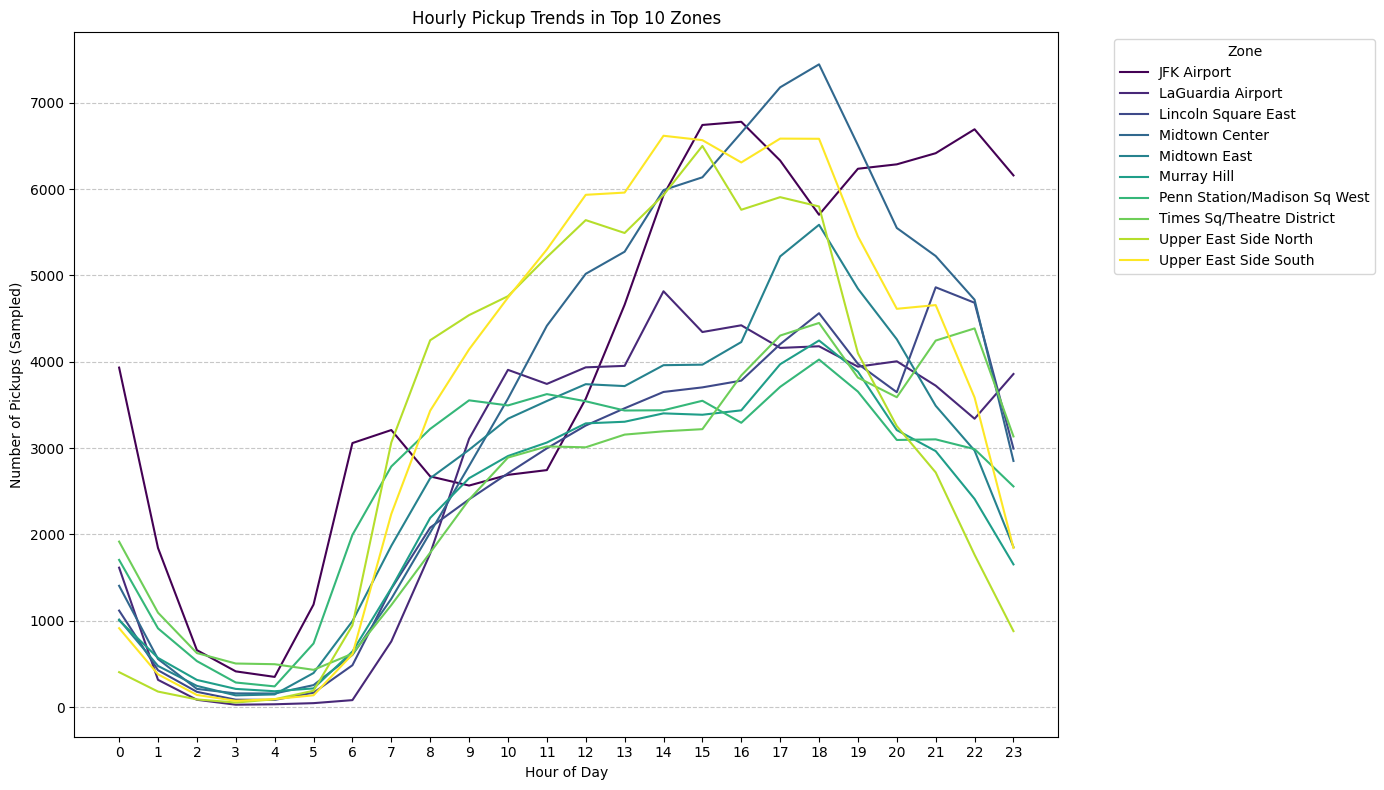

In [65]:
# Find top 10 pickup and dropoff zones

pickups_by_zone = df_merged_pu.groupby('PULocationID').size().reset_index(name='total_pickups')
top_10_pickup_zones_id = pickups_by_zone.sort_values(by='total_pickups', ascending=False).head(10)['PULocationID'].tolist()

# Total dropoffs per zone (using DOLocationID)
dropoffs_by_zone = df_merged_pu.groupby('DOLocationID').size().reset_index(name='total_dropoffs')
top_10_dropoff_zones_id = dropoffs_by_zone.sort_values(by='total_dropoffs', ascending=False).head(10)['DOLocationID'].tolist()

print(f"\nTop 10 Pickup Zone IDs: {top_10_pickup_zones_id}")
print(f"Top 10 Dropoff Zone IDs: {top_10_dropoff_zones_id}")

# Get zone names for readability
top_pickup_zones_names = zones[zones['LocationID'].isin(top_10_pickup_zones_id)][['LocationID', 'zone', 'borough']]
top_dropoff_zones_names = zones[zones['LocationID'].isin(top_10_dropoff_zones_id)][['LocationID', 'zone', 'borough']]

print("\nTop 10 Pickup Zones (Name, Borough):")
print(top_pickup_zones_names)
print("\nTop 10 Dropoff Zones (Name, Borough):")
print(top_dropoff_zones_names)

# Show pickup trends in these top zones (hourly)
plt.figure(figsize=(14, 8))
df_merged_pu[df_merged_pu['PULocationID'].isin(top_10_pickup_zones_id)].groupby(['pickup_hour', 'zone']).size().unstack().plot(ax=plt.gca(), cmap='viridis')
plt.title('Hourly Pickup Trends in Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups (Sampled)')
plt.xticks(range(24))
plt.legend(title='Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Show dropoff trends in these top zones (hourly)
plt.figure(figsize=(14, 8))
# Need to merge df with DOLocationID and zones data for dropoff zone names
df_merged_do = pd.merge(df, zones[['LocationID', 'zone', 'borough']],
                        left_on='DOLocationID', right_on='LocationID', how='left')
df_merged_do[df_merged_do['DOLocationID'].isin(top_10_dropoff_zones_id)].groupby(['pickup_hour', 'zone']).size().unstack().plot(ax=plt.gca(), cmap='plasma')
plt.title('Hourly Dropoff Trends in Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs (Sampled)')
plt.xticks(range(24))
plt.legend(title='Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [66]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

total_pickups = df.groupby('PULocationID').size().reset_index(name='pickups')
total_dropoffs = df.groupby('DOLocationID').size().reset_index(name='dropoffs')

# Merge these into a single DataFrame for zone-wise analysis
zone_traffic = pd.merge(total_pickups, total_dropoffs, left_on='PULocationID', right_on='DOLocationID', how='outer')
zone_traffic.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
zone_traffic[['pickups', 'dropoffs']] = zone_traffic[['pickups', 'dropoffs']].fillna(0) # Fill NaNs for zones with only pickups or dropoffs

# Calculate pickup-to-dropoff ratio
# Handle division by zero: if dropoffs are 0, ratio can be inf. Replace inf with a large number or NaN.
zone_traffic['pickup_dropoff_ratio'] = zone_traffic['pickups'] / zone_traffic['dropoffs']
zone_traffic['pickup_dropoff_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True) # Replace inf with NaN for easier handling

# Merge with zone names for readability
zone_traffic = pd.merge(zone_traffic, zones[['LocationID', 'zone', 'borough']], on='LocationID', how='left')

# Sort and display highest and lowest ratios
highest_ratios = zone_traffic.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
lowest_ratios = zone_traffic.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10) # Excluding NaNs if present

print("\nTop 10 Zones with Highest Pickup-to-Dropoff Ratio (More Pickups than Dropoffs):")
print(highest_ratios[['zone', 'borough', 'pickups', 'dropoffs', 'pickup_dropoff_ratio']])

print("\nTop 10 Zones with Lowest Pickup-to-Dropoff Ratio (More Dropoffs than Pickups, or low pickups):")
print(lowest_ratios[['zone', 'borough', 'pickups', 'dropoffs', 'pickup_dropoff_ratio']])



Top 10 Zones with Highest Pickup-to-Dropoff Ratio (More Pickups than Dropoffs):
                             zone    borough  pickups  dropoffs  \
70                  East Elmhurst     Queens   8354.0    1004.0   
128                   JFK Airport     Queens  96827.0   20969.0   
134             LaGuardia Airport     Queens  64177.0   22249.0   
182  Penn Station/Madison Sq West  Manhattan  63471.0   40116.0   
42                   Central Park  Manhattan  30752.0   22369.0   
110       Greenwich Village South  Manhattan  24113.0   17540.0   
245                  West Village  Manhattan  40406.0   30467.0   
158                  Midtown East  Manhattan  65634.0   52248.0   
157                Midtown Center  Manhattan  85948.0   71647.0   
100              Garment District  Manhattan  30207.0   25344.0   

     pickup_dropoff_ratio  
70               8.320717  
128              4.617626  
134              2.884489  
182              1.582187  
42               1.374760  
110          

C:\Users\admin\AppData\Local\Temp\ipykernel_9204\685816944.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zone_traffic['pickup_dropoff_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True) # Replace inf with NaN for easier handling


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [67]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)].copy()

# Group by PULocationID and DOLocationID for night hours
night_pickups_by_zone = night_hours_df.groupby('PULocationID').size().reset_index(name='night_pickups')
night_dropoffs_by_zone = night_hours_df.groupby('DOLocationID').size().reset_index(name='night_dropoffs')

# Get top 10 pickup and dropoff zones for night hours
top_10_night_pickup_zones = night_pickups_by_zone.sort_values(by='night_pickups', ascending=False).head(10)
top_10_night_dropoff_zones = night_dropoffs_by_zone.sort_values(by='night_dropoffs', ascending=False).head(10)

# Merge with zone names
top_10_night_pickup_zones = pd.merge(top_10_night_pickup_zones, zones[['LocationID', 'zone', 'borough']],
                                     left_on='PULocationID', right_on='LocationID', how='left')
top_10_night_dropoff_zones = pd.merge(top_10_night_dropoff_zones, zones[['LocationID', 'zone', 'borough']],
                                      left_on='DOLocationID', right_on='LocationID', how='left')

print("\nTop 10 Zones with High Pickups during Night Hours (11 PM - 5 AM):")
print(top_10_night_pickup_zones[['zone', 'borough', 'night_pickups']])

print("\nTop 10 Zones with High Dropoffs during Night Hours (11 PM - 5 AM):")
print(top_10_night_dropoff_zones[['zone', 'borough', 'night_dropoffs']])




Top 10 Zones with High Pickups during Night Hours (11 PM - 5 AM):
                           zone    borough  night_pickups
0                  East Village  Manhattan          15552
1                   JFK Airport     Queens          14545
2                  West Village  Manhattan          12472
3                  Clinton East  Manhattan          10463
4               Lower East Side  Manhattan           9629
5       Greenwich Village South  Manhattan           8749
6     Times Sq/Theatre District  Manhattan           8206
7  Penn Station/Madison Sq West  Manhattan           6968
8                 Midtown South  Manhattan           6143
9                  East Chelsea  Manhattan           6050

Top 10 Zones with High Dropoffs during Night Hours (11 PM - 5 AM):
                        zone    borough  night_dropoffs
0               East Village  Manhattan            8314
1               Clinton East  Manhattan            6874
2                Murray Hill  Manhattan            6266
3  

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.


Revenue Share by Day Period:
day_period
Day      87.936238
Night    12.063762
Name: total_amount, dtype: float64


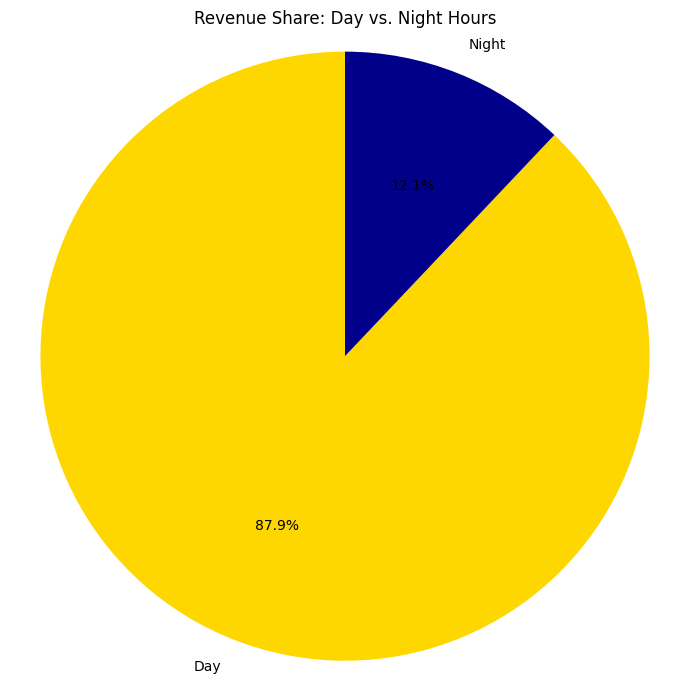

In [68]:
# Filter for night hours (11 PM to 5 AM)

df['day_period'] = df['pickup_hour'].apply(lambda x: 'Night' if (x >= 23 or x <= 5) else 'Day')

revenue_by_period = df.groupby('day_period')['total_amount'].sum()
total_revenue_all = revenue_by_period.sum()
revenue_share_by_period = (revenue_by_period / total_revenue_all) * 100

print("\nRevenue Share by Day Period:")
print(revenue_share_by_period)

plt.figure(figsize=(7, 7))
plt.pie(revenue_share_by_period, labels=revenue_share_by_period.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'darkblue'])
plt.title('Revenue Share: Day vs. Night Hours')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

C:\Users\admin\AppData\Local\Temp\ipykernel_9204\3105163458.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_financial['fare_per_mile_per_passenger'].replace([np.inf, -np.inf], np.nan, inplace=True)



Average Fare per Mile per Passenger for different Passenger Counts:
passenger_count
1    11.005932
2     6.427124
3     3.908226
4     4.363335
5     1.709614
6     1.350823
Name: fare_per_mile_per_passenger, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_9204\3105163458.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_fare_per_mile_per_passenger.index, y=avg_fare_per_mile_per_passenger.values, palette='viridis')


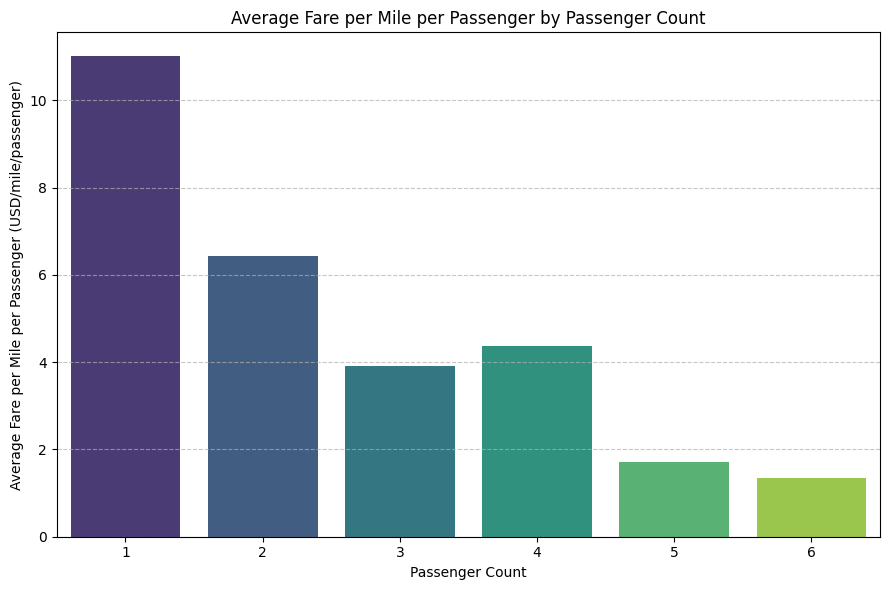

In [69]:
# Analyse the fare per mile per passenger for different passenger counts
df_financial['fare_per_mile'] = df_financial['fare_amount'] / df_financial['trip_distance']
df_financial['fare_per_mile_per_passenger'] = df_financial['fare_per_mile'] / df_financial['passenger_count']

# Handle inf values that might arise if passenger_count was 0 despite filtering
df_financial['fare_per_mile_per_passenger'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_financial.dropna(subset=['fare_per_mile_per_passenger'], inplace=True) # Remove NaNs

avg_fare_per_mile_per_passenger = df_financial.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()
print("\nAverage Fare per Mile per Passenger for different Passenger Counts:")
print(avg_fare_per_mile_per_passenger)

plt.figure(figsize=(9, 6))
sns.barplot(x=avg_fare_per_mile_per_passenger.index, y=avg_fare_per_mile_per_passenger.values, palette='viridis')
plt.title('Average Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare per Mile per Passenger (USD/mile/passenger)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week


Average Fare per Mile by Hour of Day:
pickup_hour
0     10.526099
1     11.273357
2      9.942036
3     10.870866
4     14.004000
5     14.241165
6     11.204280
7     10.284211
8     10.392872
9     10.393090
10    13.117128
11    10.954145
12    12.060776
13    11.997917
14    11.628768
15    12.478519
16    13.912929
17    11.962624
18    11.541822
19    11.615659
20     9.569303
21     9.519266
22    10.154484
23    10.695948
Name: fare_per_mile, dtype: float64


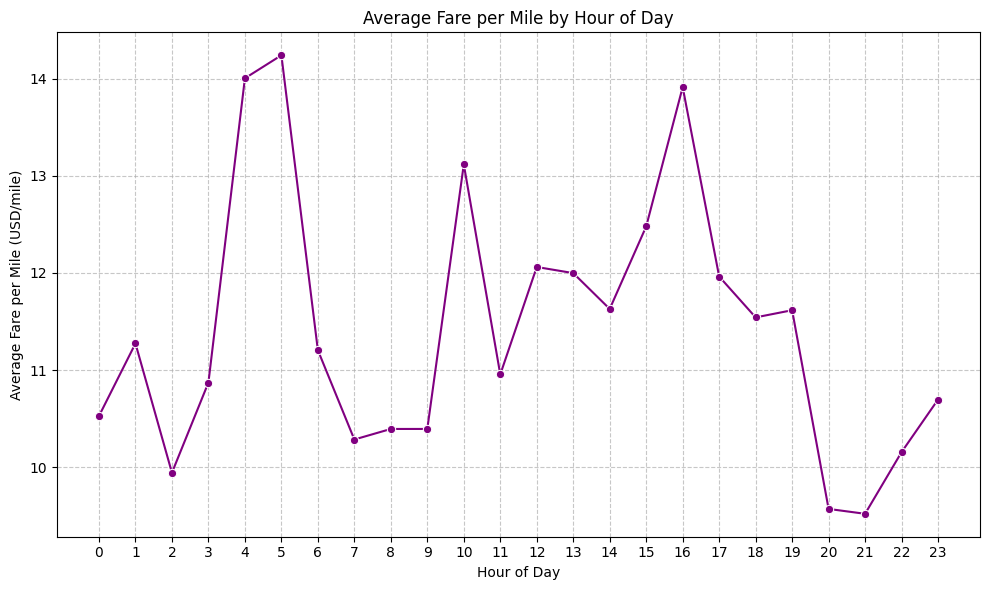


Average Fare per Mile by Day of Week:
pickup_day_of_week
Monday       10.982012
Tuesday      12.149909
Wednesday    11.112734
Thursday     11.263672
Friday       10.906075
Saturday     10.921498
Sunday       12.530123
Name: fare_per_mile, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_9204\911079829.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_fare_per_mile_daily.index, y=avg_fare_per_mile_daily.values, palette='mako')


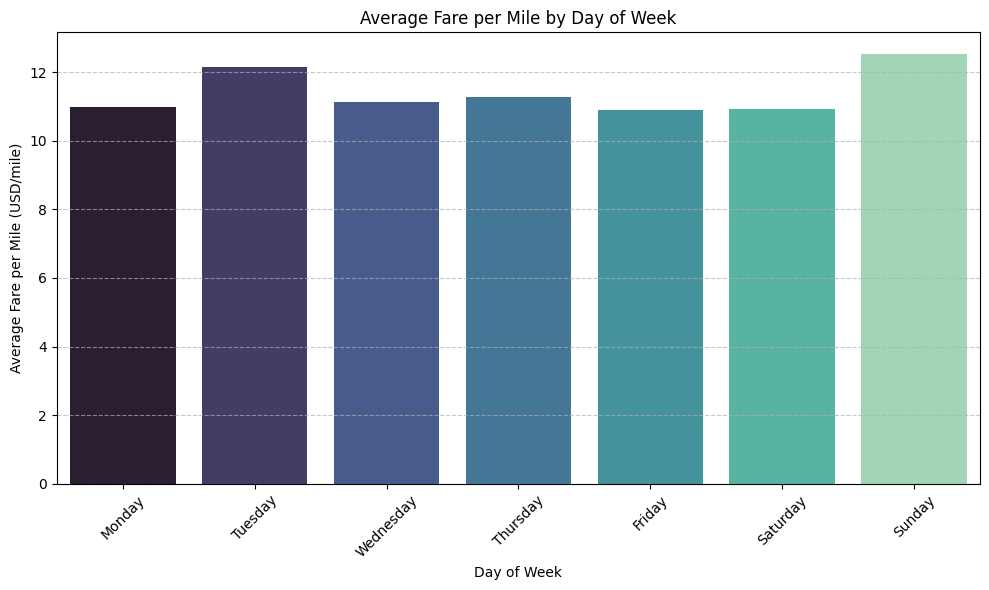

In [70]:
# Compare the average fare per mile for different days and for different times of the day

avg_fare_per_mile_hourly = df_financial.groupby('pickup_hour')['fare_per_mile'].mean()
print("\nAverage Fare per Mile by Hour of Day:")
print(avg_fare_per_mile_hourly)

plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_fare_per_mile_hourly.index, y=avg_fare_per_mile_hourly.values, marker='o', color='purple')
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile (USD/mile)')
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Average fare per mile by day of the week
avg_fare_per_mile_daily = df_financial.groupby('pickup_day_of_week')['fare_per_mile'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print("\nAverage Fare per Mile by Day of Week:")
print(avg_fare_per_mile_daily)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_fare_per_mile_daily.index, y=avg_fare_per_mile_daily.values, palette='mako')
plt.title('Average Fare per Mile by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Fare per Mile (USD/mile)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day


Average Fare per Mile by Vendor and Hour of Day:
pickup_hour         0          1          2          3          4          5   \
VendorID                                                                        
1             6.800261   7.061896   6.932493   6.516771   7.510611   6.996239   
2            11.619764  12.512717  10.860060  12.174773  16.178642  17.240482   

pickup_hour         6          7          8          9   ...         14  \
VendorID                                                 ...              
1             6.659108   7.195104   8.076754   8.404994  ...   8.657879   
2            13.176059  11.554774  11.318847  11.181191  ...  12.752845   

pickup_hour         15         16         17         18         19         20  \
VendorID                                                                        
1             8.821435   8.840472   8.657574   8.465467   7.925439   7.472395   
2            13.846452  15.799589  13.144018  12.607856  12.848562  10.247919   


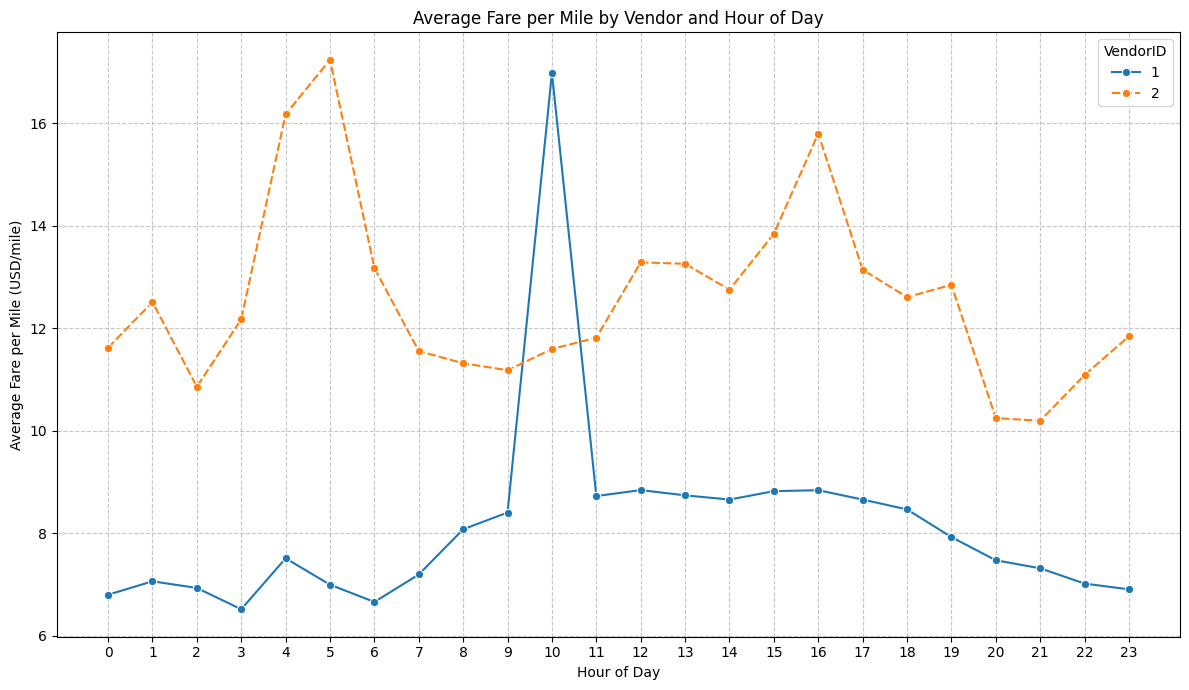

In [71]:
# Compare fare per mile for different vendors

avg_fare_per_mile_vendor_hourly = df_financial.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().unstack()
print("\nAverage Fare per Mile by Vendor and Hour of Day:")
print(avg_fare_per_mile_vendor_hourly)

plt.figure(figsize=(12, 7))
sns.lineplot(data=avg_fare_per_mile_vendor_hourly.T, marker='o') # Transpose for hours on x-axis
plt.title('Average Fare per Mile by Vendor and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile (USD/mile)')
plt.xticks(range(24))
plt.legend(title='VendorID')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.



Average Fare per Mile by Vendor and Distance Tier:
distance_tier  0-2 miles  2-5 miles  > 5 miles
VendorID                                      
1              10.673158   6.381275   4.425264
2              17.912767   6.549310   4.503213


C:\Users\admin\AppData\Local\Temp\ipykernel_9204\2580874446.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_fare_per_mile_vendor_tier = df_financial.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().unstack()


<Figure size 1000x600 with 0 Axes>

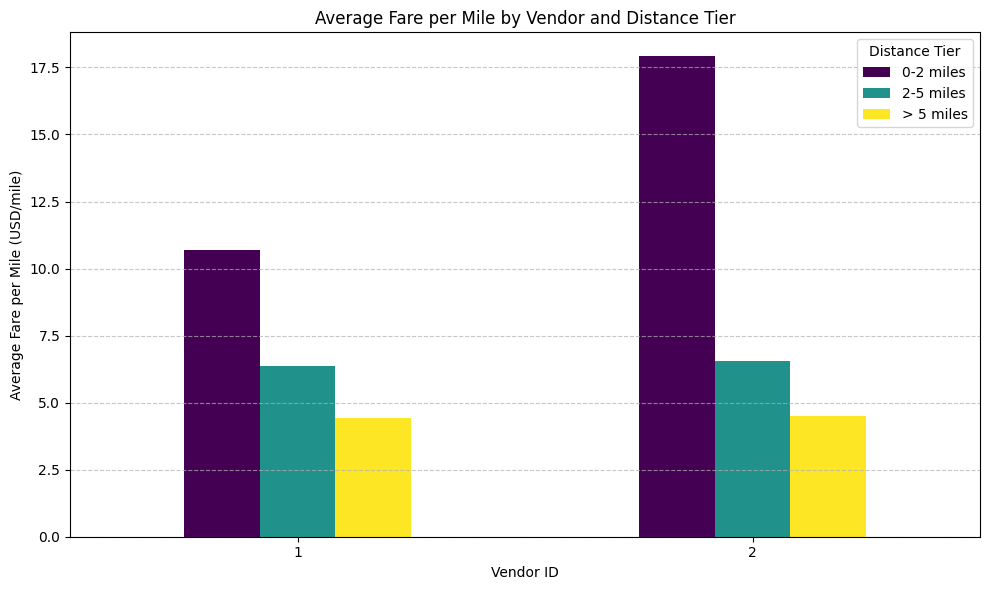

In [72]:
# Defining distance tiers
def get_distance_tier(distance):
    if distance <= 2:
        return '0-2 miles'
    elif 2 < distance <= 5:
        return '2-5 miles'
    else:
        return '> 5 miles'

df_financial['distance_tier'] = df_financial['trip_distance'].apply(get_distance_tier)

# Ensure the categories are ordered for plotting
distance_tier_order = ['0-2 miles', '2-5 miles', '> 5 miles']
df_financial['distance_tier'] = pd.Categorical(df_financial['distance_tier'], categories=distance_tier_order, ordered=True)


avg_fare_per_mile_vendor_tier = df_financial.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().unstack()
print("\nAverage Fare per Mile by Vendor and Distance Tier:")
print(avg_fare_per_mile_vendor_tier)

plt.figure(figsize=(10, 6))
avg_fare_per_mile_vendor_tier.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile (USD/mile)')
plt.xticks(rotation=0)
plt.legend(title='Distance Tier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

C:\Users\admin\AppData\Local\Temp\ipykernel_9204\3900927402.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_financial['tip_percentage'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_9204\3900927402.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_pct_distance = df_financial


Average Tip Percentage by Distance Tier:
distance_tier
0-2 miles    22.253293
2-5 miles    18.714564
> 5 miles    16.481203
Name: tip_percentage_clipped, dtype: float64


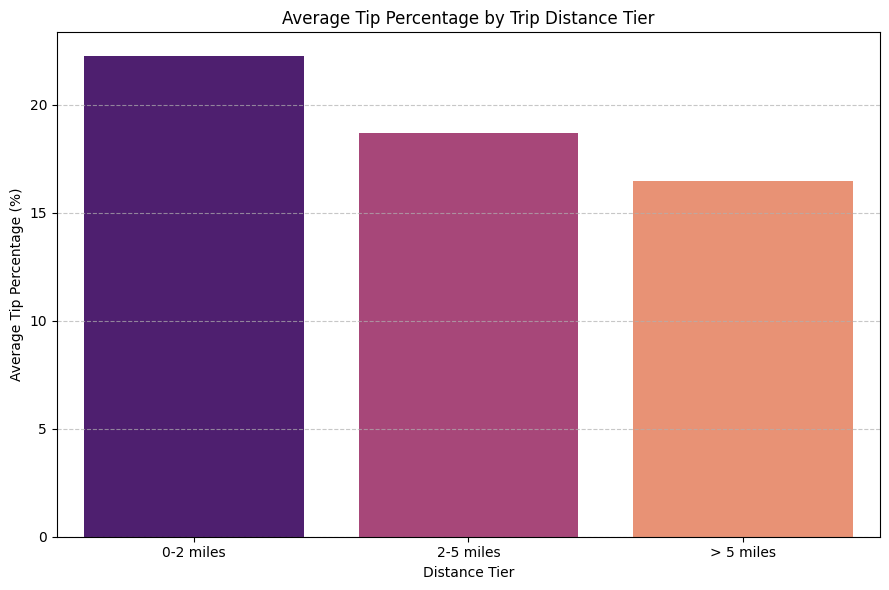


Average Tip Percentage by Passenger Count:
passenger_count
1    20.560054
2    19.665349
3    18.937299
4    17.390582
5    20.451955
6    20.442302
Name: tip_percentage_clipped, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_9204\3900927402.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_tip_pct_passenger.index, y=avg_tip_pct_passenger.values, palette='viridis')


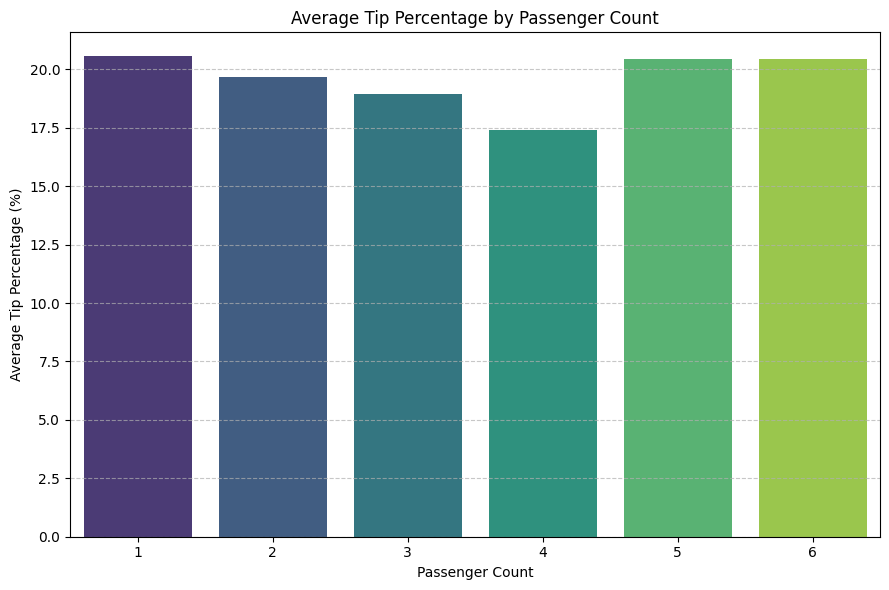


Average Tip Percentage by Hour of Pickup:
pickup_hour
0     20.306299
1     20.463876
2     20.376294
3     19.638832
4     17.741154
5     17.373448
6     18.176552
7     19.552470
8     19.957297
9     19.630919
10    19.164402
11    19.088001
12    19.042328
13    18.929139
14    18.933700
15    18.918839
16    20.785871
17    21.575623
18    22.149235
19    22.115897
20    21.416376
21    21.445545
22    21.171003
23    20.516330
Name: tip_percentage_clipped, dtype: float64


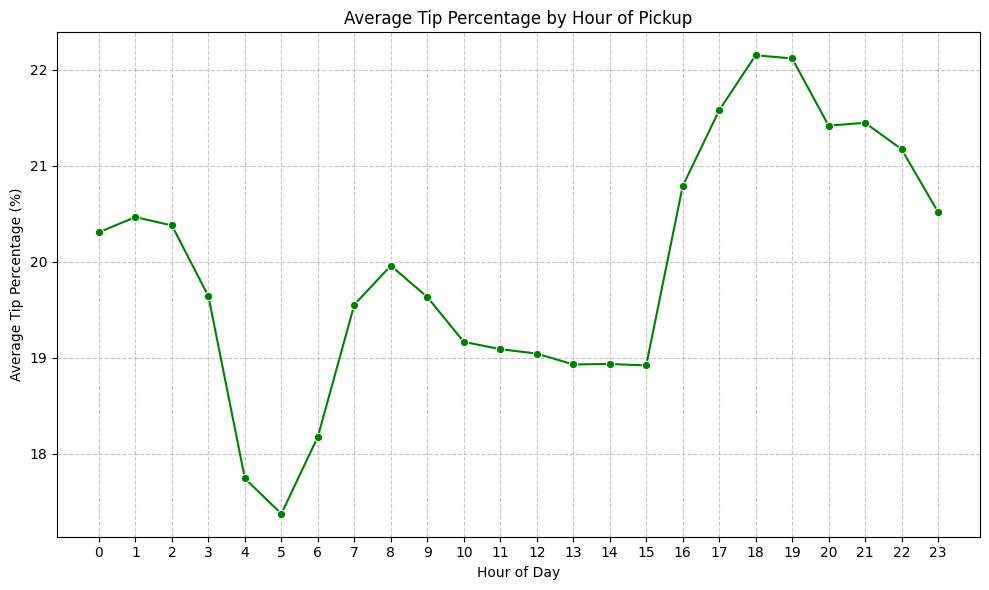

In [75]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df_financial['tip_percentage'] = (df_financial['tip_amount'] / df_financial['fare_amount']) * 100
# Replace inf/NaN if fare_amount was 0 but tip was not (unlikely due to df_financial filtering)
df_financial['tip_percentage'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_financial.dropna(subset=['tip_percentage'], inplace=True) # Drop any remaining NaNs after calculation
# Cap tip percentage at a reasonable max (e.g., 1000% or 10000%) to remove extreme outliers from errors
# For visualization, extreme values can be clipped
df_financial['tip_percentage_clipped'] = df_financial['tip_percentage'].clip(upper=100) # Clip at 100% for visualization clarity

# Average tip percentage by trip distance (using distance tiers)
avg_tip_pct_distance = df_financial.groupby('distance_tier')['tip_percentage_clipped'].mean()
print("\nAverage Tip Percentage by Distance Tier:")
print(avg_tip_pct_distance)

plt.figure(figsize=(9, 6))
sns.barplot(x=avg_tip_pct_distance.index, y=avg_tip_pct_distance.values, palette='magma')
plt.title('Average Tip Percentage by Trip Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Tip Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Average tip percentage by passenger counts
avg_tip_pct_passenger = df_financial.groupby('passenger_count')['tip_percentage_clipped'].mean()
print("\nAverage Tip Percentage by Passenger Count:")
print(avg_tip_pct_passenger)

plt.figure(figsize=(9, 6))
sns.barplot(x=avg_tip_pct_passenger.index, y=avg_tip_pct_passenger.values, palette='viridis')
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Average tip percentage by time of pickup (hourly)
avg_tip_pct_hourly = df_financial.groupby('pickup_hour')['tip_percentage_clipped'].mean()
print("\nAverage Tip Percentage by Hour of Pickup:")
print(avg_tip_pct_hourly)

plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_tip_pct_hourly.index, y=avg_tip_pct_hourly.values, marker='o', color='green')
plt.title('Average Tip Percentage by Hour of Pickup')
plt.xlabel('Hour of Day')
plt.ylabel('Average Tip Percentage (%)')
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [76]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tip_trips = df_financial[df_financial['tip_percentage'] < 10]
high_tip_trips = df_financial[df_financial['tip_percentage'] > 25]

print(f"\nAnalysis of Low Tip Trips (<10%, N={len(low_tip_trips)}) vs. High Tip Trips (>25%, N={len(high_tip_trips)}):")

print("\nAverage trip distance:")
print(f"  Low Tip: {low_tip_trips['trip_distance'].mean():.2f} miles")
print(f"  High Tip: {high_tip_trips['trip_distance'].mean():.2f} miles")

print("\nAverage trip duration:")
print(f"  Low Tip: {low_tip_trips['trip_duration_minutes'].mean():.2f} minutes")
print(f"  High Tip: {high_tip_trips['trip_duration_minutes'].mean():.2f} minutes")

# Average fare amount
print("\nAverage fare amount:")
print(f"  Low Tip: {low_tip_trips['fare_amount'].mean():.2f}")
print(f"  High Tip: {high_tip_trips['fare_amount'].mean():.2f}")

# Average speed
print("\nAverage speed (mph):")
print(f"  Low Tip: {low_tip_trips['trip_speed_mph'].mean():.2f}")
print(f"  High Tip: {high_tip_trips['trip_speed_mph'].mean():.2f}")



Analysis of Low Tip Trips (<10%, N=471041) vs. High Tip Trips (>25%, N=813370):

Average trip distance:
  Low Tip: 3.92 miles
  High Tip: 2.30 miles

Average trip duration:
  Low Tip: 20.07 minutes
  High Tip: 12.74 minutes

Average fare amount:
  Low Tip: 21.89
  High Tip: 14.41

Average speed (mph):
  Low Tip: 14.00
  High Tip: 10.64


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.


Average Passenger Count by Hour of Day:
pickup_hour
0     1.428739
1     1.433164
2     1.449115
3     1.455269
4     1.401759
5     1.296677
6     1.254986
7     1.276363
8     1.293506
9     1.316635
10    1.354494
11    1.365081
12    1.381450
13    1.385238
14    1.392047
15    1.409358
16    1.406662
17    1.392909
18    1.379101
19    1.391330
20    1.399449
21    1.427133
22    1.429592
23    1.422489
Name: passenger_count, dtype: float64


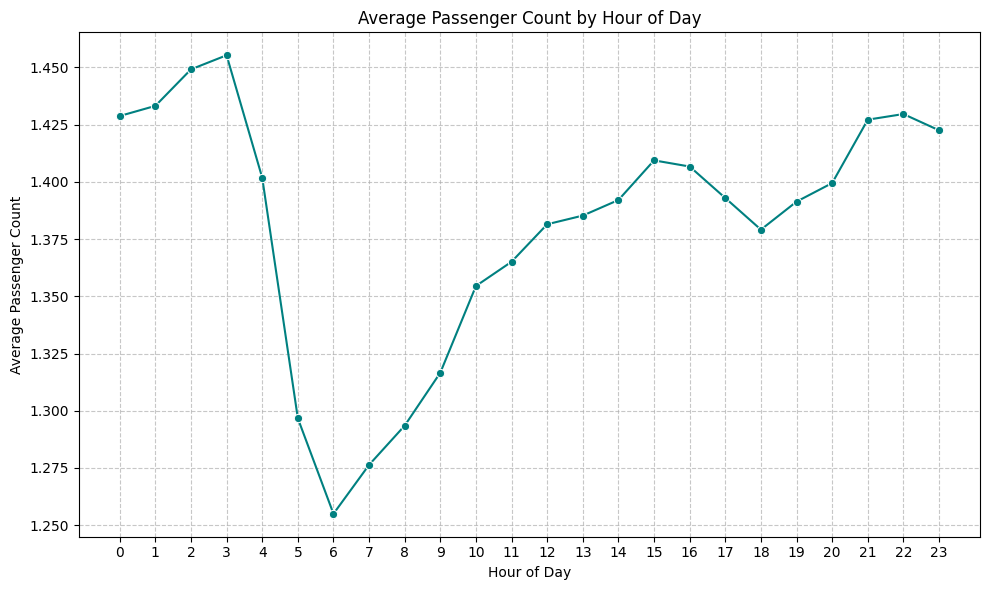


Average Passenger Count by Day of Week:
pickup_day_of_week
Monday       1.360900
Tuesday      1.332980
Wednesday    1.329670
Thursday     1.343028
Friday       1.400156
Saturday     1.479935
Sunday       1.464310
Name: passenger_count, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_9204\1416079203.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_passenger_count_daily.index, y=avg_passenger_count_daily.values, palette='crest')


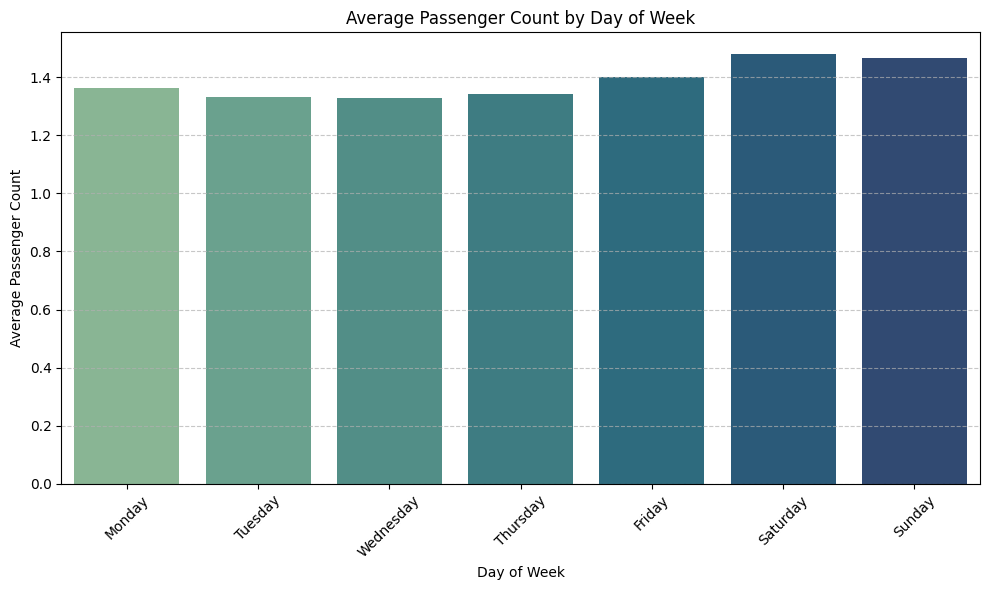

In [77]:
# See how passenger count varies across hours and days

avg_passenger_count_hourly = df.groupby('pickup_hour')['passenger_count'].mean()
print("\nAverage Passenger Count by Hour of Day:")
print(avg_passenger_count_hourly)

plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_passenger_count_hourly.index, y=avg_passenger_count_hourly.values, marker='o', color='teal')
plt.title('Average Passenger Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Passenger count variation across days of the week
avg_passenger_count_daily = df.groupby('pickup_day_of_week')['passenger_count'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print("\nAverage Passenger Count by Day of Week:")
print(avg_passenger_count_daily)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_passenger_count_daily.index, y=avg_passenger_count_daily.values, palette='crest')
plt.title('Average Passenger Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones

avg_passenger_count_per_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index(name='avg_passenger_count')

# Merge this with the zones_with_trips GeoDataFrame
zones_with_avg_passengers = pd.merge(zones_with_trips, avg_passenger_count_per_zone,
                                     left_on='LocationID', right_on='PULocationID', how='left')

# Fill NaN average passenger counts (for zones with no pickups) with 0 or the overall average if preferred
zones_with_avg_passengers['avg_passenger_count'] = zones_with_avg_passengers['avg_passenger_count'].fillna(0) # or .mean() if applicable

print("\nZones GeoDataFrame with Average Passenger Count (head):")
print(zones_with_avg_passengers[['zone', 'borough', 'total_pickups', 'avg_passenger_count']].head())




Zones GeoDataFrame with Average Passenger Count (head):
                      zone        borough  total_pickups  avg_passenger_count
0           Newark Airport            EWR            214             1.602804
1              Jamaica Bay         Queens              2             1.000000
2  Allerton/Pelham Gardens          Bronx             40             1.025000
3            Alphabet City      Manhattan           1861             1.430414
4            Arden Heights  Staten Island             13             1.000000


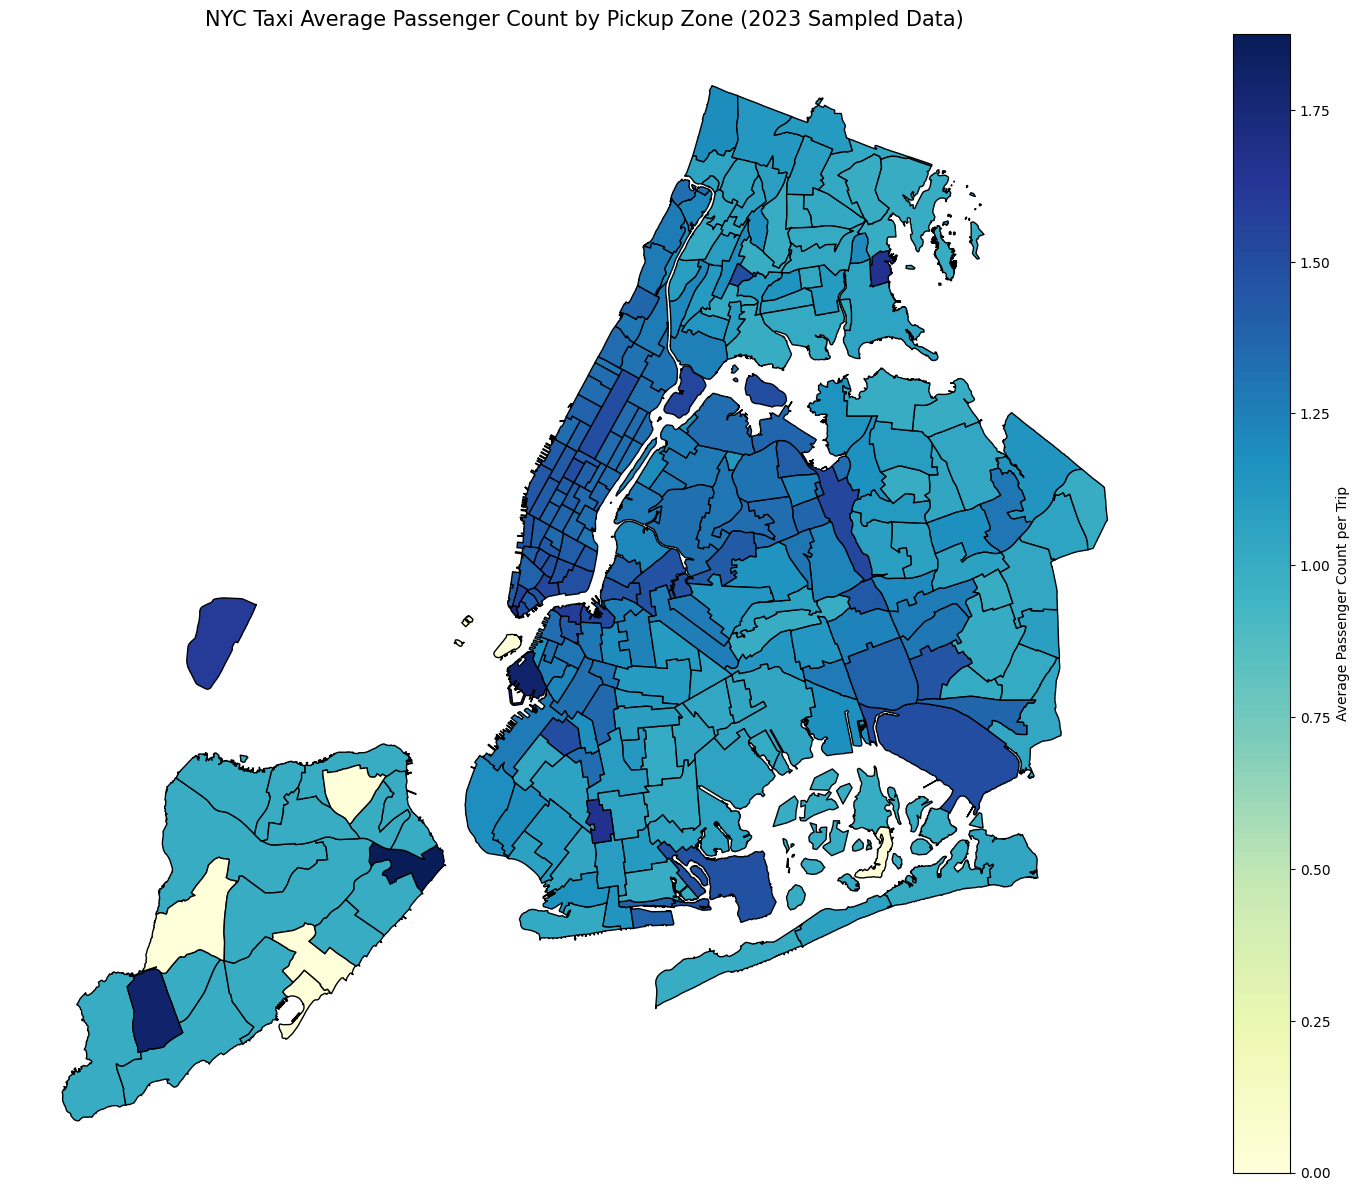

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# Plotting average passenger count per zone
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
zones_with_avg_passengers.plot(column='avg_passenger_count', ax=ax, legend=True,
                               legend_kwds={'label': "Average Passenger Count per Trip", 'orientation': "vertical"},
                               cmap='YlGnBu', # Colormap for continuous values
                               edgecolor='black',
                               missing_kwds={"color": "lightgrey", "label": "No pickups"})
ax.set_title('NYC Taxi Average Passenger Count by Pickup Zone (2023 Sampled Data)', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.axis('off')
plt.tight_layout()
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently


Prevalence of each surcharge (Percentage of trips where surcharge > 0):
- extra: 61.94% of trips
- mta_tax: 99.07% of trips
- improvement_surcharge: 99.96% of trips
- congestion_surcharge: 92.31% of trips
- airport_fee: 0.71% of trips

Hourly Prevalence of 'extra' charges (% of trips with 'extra' charge):
    pickup_hour  extra_charge_percentage
2             2                97.246242
1             1                96.712177
21           21                96.416490
22           22                96.271543
3             3                96.091094


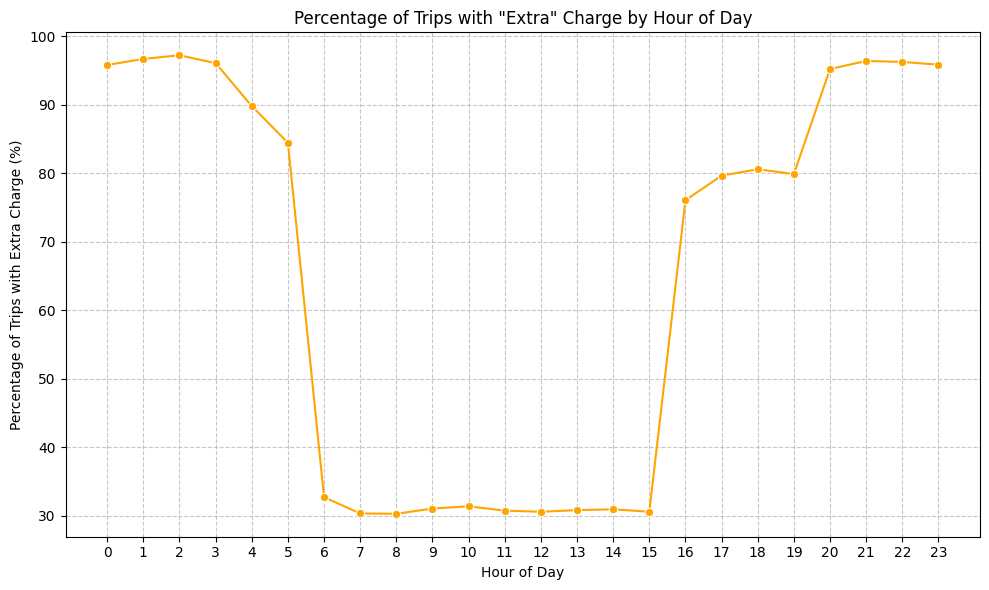


Hourly Prevalence of 'congestion_surcharge' (% of trips with 'congestion_surcharge'):
    pickup_hour  congestion_charge_percentage
2             2                     94.266330
18           18                     93.851691
19           19                     93.373879
3             3                     93.331067
17           17                     93.206704



Top 10 Pickup Zones with most frequent 'Congestion Surcharge':
                           zone    borough  trips_with_congestion
0         Upper East Side South  Manhattan                  86673
1                Midtown Center  Manhattan                  85265
2         Upper East Side North  Manhattan                  77102
3                  Midtown East  Manhattan                  65190
4  Penn Station/Madison Sq West  Manhattan                  63074
5           Lincoln Square East  Manhattan                  60591
6     Times Sq/Theatre District  Manhattan                  60283
7                   Murray Hill  Manhattan                  54042
8                 Midtown North  Manhattan                  53174
9         Upper West Side South  Manhattan                  50120

Top 5 Pickup Zones with most frequent 'Airport Fee':
                zone borough  trips_with_airport_fee
0        JFK Airport  Queens                    7572
1  LaGuardia Airport  Queens                    43

In [ ]:
# How often is each surcharge applied?

surcharge_columns = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']

# Prevalence of each surcharge
print("\nPrevalence of each surcharge (Percentage of trips where surcharge > 0):")
for col in surcharge_columns:
    prevalence = (df[df[col] > 0].shape[0] / len(df)) * 100
    print(f"- {col}: {prevalence:.2f}% of trips")


# Time of day when extra charges are applied more frequently (for 'extra' and 'congestion_surcharge' specifically)
# 'extra' includes rush hour and overnight charges
extra_by_hour = df[df['extra'] > 0].groupby('pickup_hour').size().reset_index(name='trips_with_extra')
total_trips_by_hour = df.groupby('pickup_hour').size().reset_index(name='total_trips')
hourly_extra_prevalence = pd.merge(extra_by_hour, total_trips_by_hour, on='pickup_hour', how='right').fillna(0)
hourly_extra_prevalence['extra_charge_percentage'] = (hourly_extra_prevalence['trips_with_extra'] / hourly_extra_prevalence['total_trips']) * 100

print("\nHourly Prevalence of 'extra' charges (% of trips with 'extra' charge):")
print(hourly_extra_prevalence[['pickup_hour', 'extra_charge_percentage']].sort_values(by='extra_charge_percentage', ascending=False).head())

plt.figure(figsize=(10, 6))
sns.lineplot(x='pickup_hour', y='extra_charge_percentage', data=hourly_extra_prevalence, marker='o', color='orange')
plt.title('Percentage of Trips with "Extra" Charge by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Trips with Extra Charge (%)')
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Congestion surcharge by hour
congestion_by_hour = df[df['congestion_surcharge'] > 0].groupby('pickup_hour').size().reset_index(name='trips_with_congestion')
hourly_congestion_prevalence = pd.merge(congestion_by_hour, total_trips_by_hour, on='pickup_hour', how='right').fillna(0)
hourly_congestion_prevalence['congestion_charge_percentage'] = (hourly_congestion_prevalence['trips_with_congestion'] / hourly_congestion_prevalence['total_trips']) * 100

print("\nHourly Prevalence of 'congestion_surcharge' (% of trips with 'congestion_surcharge'):")
print(hourly_congestion_prevalence[['pickup_hour', 'congestion_charge_percentage']].sort_values(by='congestion_charge_percentage', ascending=False).head())

plt.figure(figsize=(10, 6))
sns.lineplot(x='pickup_hour', y='congestion_charge_percentage', data=hourly_congestion_prevalence, marker='o', color='brown')
plt.title('Percentage of Trips with "Congestion Surcharge" by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Trips with Congestion Surcharge (%)')
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Zones where congestion surcharge is applied frequently (top 10 pickup zones for congestion surcharge)
congestion_by_zone_pu = df[df['congestion_surcharge'] > 0].groupby('PULocationID').size().reset_index(name='trips_with_congestion')
top_10_congestion_zones_pu = congestion_by_zone_pu.sort_values(by='trips_with_congestion', ascending=False).head(10)
top_10_congestion_zones_pu = pd.merge(top_10_congestion_zones_pu, zones[['LocationID', 'zone', 'borough']],
                                     left_on='PULocationID', right_on='LocationID', how='left')

print("\nTop 10 Pickup Zones with most frequent 'Congestion Surcharge':")
print(top_10_congestion_zones_pu[['zone', 'borough', 'trips_with_congestion']])

# Zones where airport fee is applied frequently (top 5 pickup zones for airport fee)
# Airport fee is 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports
airport_fee_by_zone_pu = df[df['airport_fee'] > 0].groupby('PULocationID').size().reset_index(name='trips_with_airport_fee')
top_zones_airport_fee_pu = airport_fee_by_zone_pu.sort_values(by='trips_with_airport_fee', ascending=False).head(5)
top_zones_airport_fee_pu = pd.merge(top_zones_airport_fee_pu, zones[['LocationID', 'zone', 'borough']],
                                     left_on='PULocationID', right_on='LocationID', how='left')

print("\nTop 5 Pickup Zones with most frequent 'Airport Fee':")
print(top_zones_airport_fee_pu[['zone', 'borough', 'trips_with_airport_fee']])

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies



1. Leverage the hourly and daily demand patterns to dynamically reallocate drivers. Dispatch more cabs to high-demand zones (e.g., Midtown, JFK, LaGuardia) during their peak times, and fewer during off-peak hours to minimize idle time and maximize fleet utilization.

2. Use real-time and historical data to predict upcoming demand hotspots and pre-position vehicles.  For zones with low ratios (more drop-offs), encourage drivers to quickly move to nearby high-demand pickup areas or offer incentives for repositioning.

3. Identify and communicate 'slow routes' (e.g., during specific rush hours or in highly congested zones like midtown Manhattan) to drivers. 

4. During quiet hours (e.g., early morning weekdays, specific low-demand zones), implement targeted marketing campaigns or offer dynamic discounts to stimulate demand and ensure steady utilization of the fleet, avoiding drivers from congregating in anticipation of demand that isn't there.

5. Given sustained night demand in areas like airports and entertainment districts, consider having dedicated night shifts or specialized services for these zones. This ensures consistent service for late-night passengers and provides predictable earnings for drivers working these shifts.



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.



1. Establish "mini-hubs" in high-pickup zones (e.g., specific Manhattan neighborhoods, major train stations) during peak hours. Pre-position a higher concentration of cabs in these areas just before and during rush hour periods. This minimizes passenger wait times and maximizes pickup efficiency.

2. Coordinate with local event calendars (concerts, sports events, major conventions) and dynamically reallocate cabs to zones surrounding these venues before and after events, anticipating spikes in demand.

3. Actively manage the balance between pickup and drop-off zones. Use the pickup/dropoff ratio insights: if a zone has a consistently low pickup/dropoff ratio (meaning more drop-offs), drivers completing trips there should be guided to reposition to nearby zones with high pickup ratios or anticipated demand.

4. For airport zones (JFK, LaGuardia), which are significant sources of both pickups and drop-offs, establish clear queue management systems for drivers. Analyze specific times when demand is highest for airport pickups (e.g., after typical flight arrival times) and ensure adequate supply, potentially using a tiered pricing structure during peak airport demand.

5. While monthly trends showed stability, for longer-term planning, consider external factors not in the data (e.g., tourist seasons, holiday periods) that might influence demand in specific zones (e.g., tourist attractions, shopping districts). Adjust positioning strategies accordingly.

6. In zones with higher average passenger counts, consider dispatching larger vehicles (if available in the fleet) to better serve groups and improve customer experience for those trips.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.



1. Implement surge pricing during identified peak demand hours (e.g., weekday rush hours 7–9 AM, 5–7 PM; weekend evenings 8 PM–1 AM) and in high-demand geographical zones (top 10 pickup zones, especially Manhattan). This maximizes revenue during periods of high utilization and incentivizes drivers to be available.

2. Adjust the average fare per mile based on distance tiers. Based on the analysis, if competitors show higher rates for short trips (0–2 miles) or very long trips (>5 miles), evaluate if our pricing in these tiers can be marginally increased without losing competitiveness. Conversely, if we are charging too much in a certain tier compared to competitors, adjust downwards to gain market share.

3. Analyze hourly average fare per mile. If there are hours with significantly lower average fares per mile despite decent demand (e.g., early afternoon lull), consider a slight increase during those times to improve revenue per trip.

4. During low-demand hours or in quieter zones, implement promotional pricing or discounts (e.g., flat discounts, loyalty program bonuses) to encourage ridership. This ensures a baseline level of activity and revenue even when demand is not at its peak, and reduces driver idle time.

5. Ensure transparent communication of surcharges (congestion, airport fee, extra). While these are often fixed, understanding their prevalence (e.g., congestion surcharge in specific Manhattan zones) helps in forecasting revenue accurately. Explore if certain 'extra' charges can be dynamically adjusted based on demand (e.g., slightly higher during extreme weather, lower during holidays if demand drops).

6.  Promote credit card payments over cash by potentially offering small loyalty points or benefits, as credit card trips provide valuable data for tip analysis and overall financial tracking. This helps in more accurately gauging customer satisfaction and driver performance through recorded tips.

7. Continuously monitor competitors' pricing (especially other ride-sharing apps) across different hours, days, and distance tiers. 